In [1]:
suppressMessages(library(ggplot2))
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(purrr))
suppressMessages(library(readr))
suppressMessages(library(patchwork))
suppressMessages(library(BSgenome.Hsapiens.UCSC.hg38))
suppressMessages(library(dplyr))
suppressMessages(library(cowplot))
suppressMessages(library(ggrepel))
suppressMessages(library(rhdf5))
suppressMessages(library(chromVARmotifs))

In [2]:
set.seed(42)
addArchRThreads(threads = 64)

Setting default number of Parallel threads to 64.



In [3]:
proj <- loadArchRProject("./ArchRProject_Myeloid", showLogo = FALSE)

Successfully loaded ArchRProject!



In [4]:
proj


           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /home/hanxue/lab/scATAC/BCY_ATAC_R/joint/ArchRProject_Myeloid 
samples(11): 10T 10N ... 19T 12T
sampleColData names(1): ArrowFiles
cellColData names(30): Sample TSSEnrichment ... MyePredictedCell
  MyePredictedGroup
numberOfCells(1): 4427
medianTSS(1): 15.869
medianFrags(1): 14894

In [6]:
proj <- addImputeWeights(proj)

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-bb68e77f266f0-Date-2025-03-21_Time-11-47-24.230133.log
If there is an issue, please report to github with logFile!



2025-03-21 11:47:24.454677 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.

Filtering 1 dims correlated > 0.75 to log10(depth + 1)



In [51]:
proj <- addHarmony(
    ArchRProj = proj,
    reducedDims = "IterativeLSI",
    name = "Harmony_Myeloid",
    groupBy = "Sample",
    force = TRUE
)

Filtering 1 dims correlated > 0.75 to log10(depth + 1)

Transposing data matrix

Initializing state using k-means centroids initialization

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony converged after 3 iterations



In [52]:
proj <- addUMAP(
    ArchRProj = proj,
    reducedDims = "Harmony_Myeloid",
    name = "UMAP_Myeloid",
    nNeighbors = 45,   # 默认是 15，可以尝试 30 或更大
    minDist = 0.05,     # 默认是 0.1，可以尝试 0.05 或更小
    metric = "cosine",  # 可以尝试不同的距离度量，如 "euclidean", "manhattan"
    force = TRUE
)

07:08:39 UMAP embedding parameters a = 1.75 b = 0.8421

07:08:39 Read 4427 rows and found 29 numeric columns

07:08:39 Using Annoy for neighbor search, n_neighbors = 45

07:08:39 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

07:08:39 Writing NN index file to temp file /tmp/Rtmpuhp2P7/filebb68e4a55d866

07:08:39 Searching Annoy index using 48 threads, search_k = 4500

07:08:39 Annoy recall = 100%

07:08:41 Commencing smooth kNN distance calibration using 48 threads
 with target n_neighbors = 45

07:08:42 Initializing from normalized Laplacian + noise (using RSpectra)

07:08:42 Commencing optimization for 500 epochs, with 299012 positive edges

07:08:42 Using rng type: pcg

07:08:51 Optimization finished

07:08:51 Creating temp model dir /tmp/Rtmpuhp2P7/dirbb68e6106e9f

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-ef00a74920949-Date-2025-03-25_Time-10-24-47.332875.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-ef00a74920949-Date-2025-03-25_Time-10-24-47.332875.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-ef00a6a45c5bd-Date-2025-03-25_Time-10-24-54.571735.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-ef00a6a45c5bd-Date-2025-03-25_Time-10-24-54.571735.log



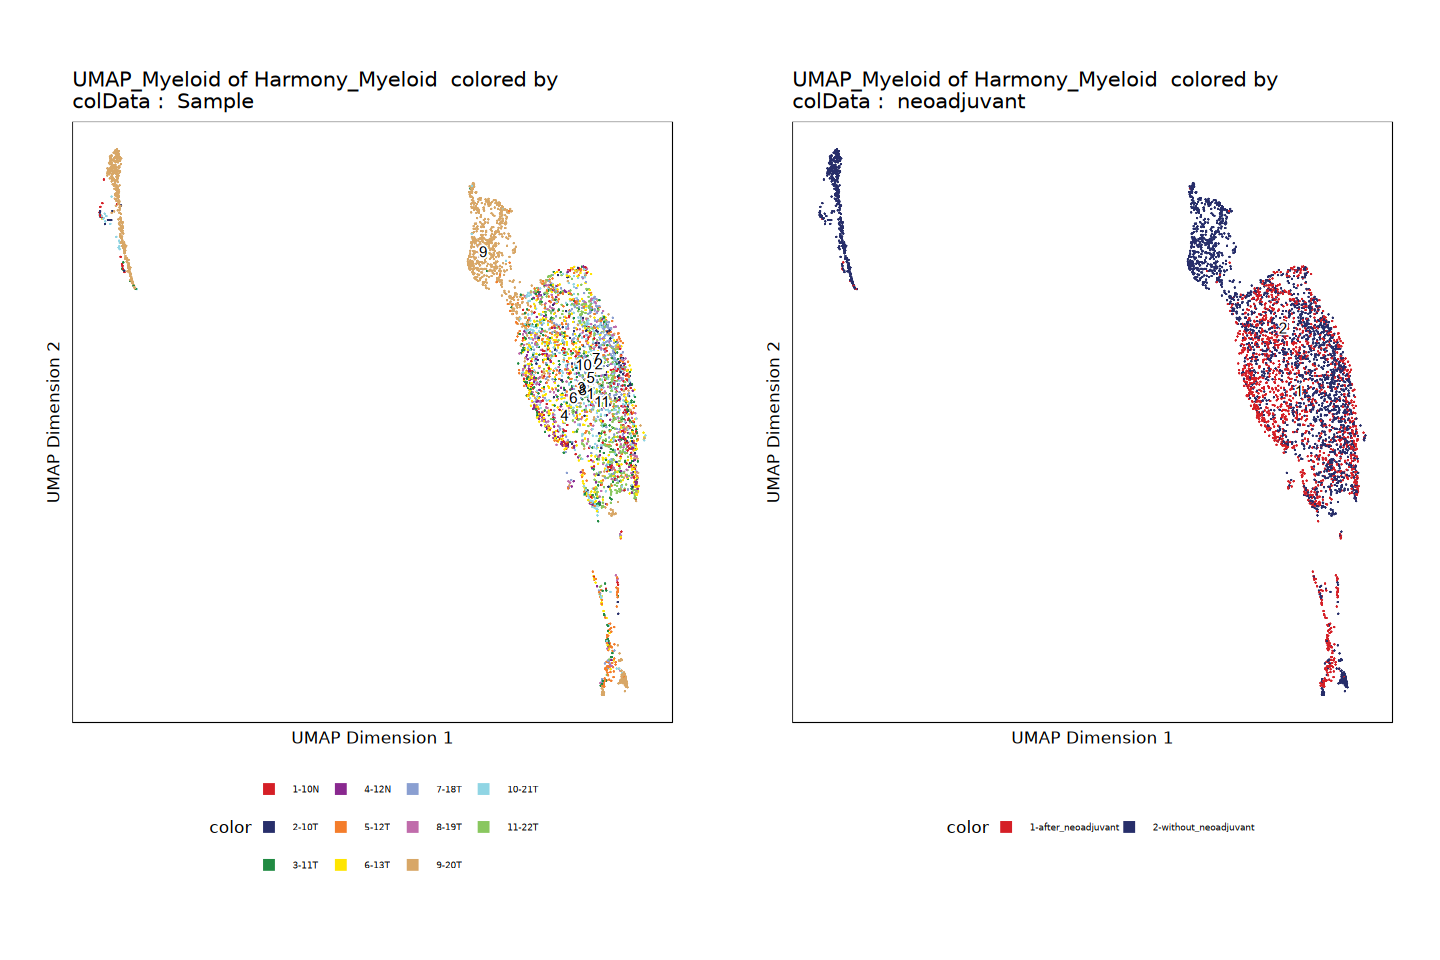

In [4]:
options(repr.plot.height = 8, repr.plot.width = 12)
p1 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "Sample", 
    embedding = "UMAP_Myeloid"
    )
p2 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "neoadjuvant", 
    embedding = "UMAP_Myeloid"
    )
ggAlignPlots(p1, p2, type = "h")

In [55]:
proj <- addClusters(proj, name = "clusters_Myeloid", resolution = 1.0, force = TRUE)

ArchR logging to : ArchRLogs/ArchR-addClusters-bb68e3143bcd4-Date-2025-03-22_Time-07-08-56.003153.log
If there is an issue, please report to github with logFile!



Overriding previous entry for clusters_Myeloid

Filtering 1 dims correlated > 0.75 to log10(depth + 1)

2025-03-22 07:08:56.285001 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.002 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4427
Number of edges: 165092

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7929
Number of communities: 12
Elapsed time: 0 seconds


2025-03-22 07:09:01.20387 : Testing Biased Clusters, 0.084 mins elapsed.

2025-03-22 07:09:01.22424 : Testing Outlier Clusters, 0.085 mins elapsed.

2025-03-22 07:09:01.227495 : Assigning Cluster Names to 12 Clusters, 0.085 mins elapsed.

2025-03-22 07:09:01.274036 : Finished addClusters, 0.085 mins elapsed.



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-15b3687a4d9f0a-Date-2025-09-06_Time-16-56-05.260962.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-15b3687a4d9f0a-Date-2025-09-06_Time-16-56-05.260962.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-15b3685c6eb1da-Date-2025-09-06_Time-16-56-05.937995.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-15b3685c6eb1da-Date-2025-09-06_Time-16-56-05.937995.log



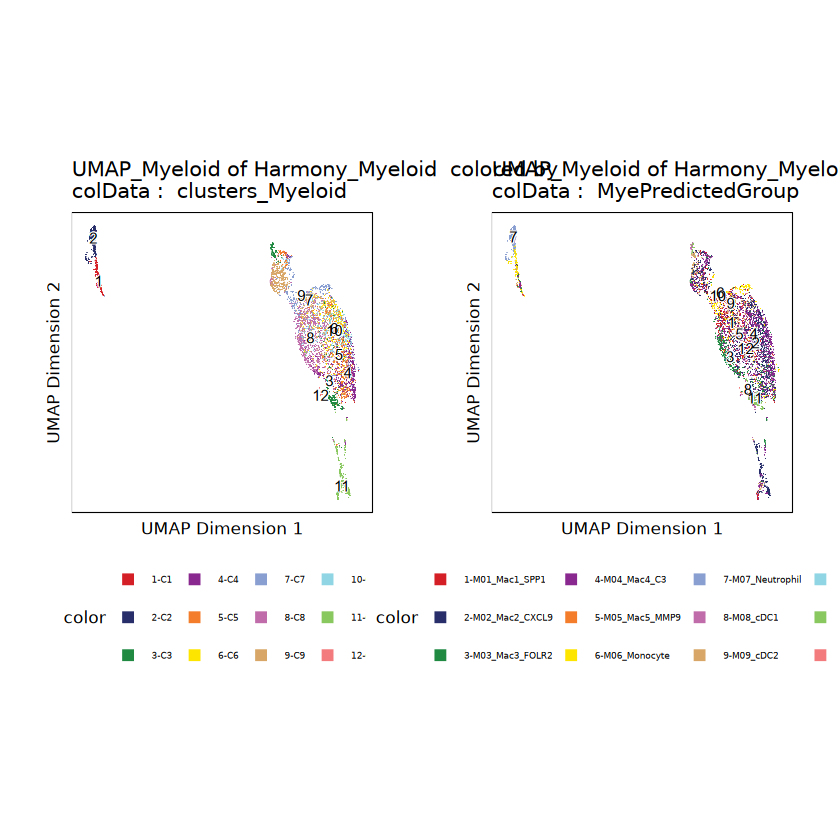

In [4]:
p1 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "clusters_Myeloid", 
    embedding = "UMAP_Myeloid"
    )
p2 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "MyePredictedGroup", 
    embedding = "UMAP_Myeloid"
    )
ggAlignPlots(p1, p2, type = "h")

In [ ]:
# 设置细胞类型和对应颜色
cell_colors <- c(
  "NKT_FGFBP2" = "#2372A9",   # blue
  "NK_NCAM1" = "#EF7C21",     # orange
  "T01_Tn/Tcm_CD4" = "#2D9865", # green
  "T02_Treg_FOXP3" = "#CA2A28", # red
  "T03_Th1_IFNG" = "#754F9D", # purple (X11)
  "T04_Th2_GATA3" = "#8A554A", # brown
  "T05_Tfh_BCL6" = "#CE76AC", # pink
  "T07_Tn/Tcm_CD8" = "#B0B761", # lightgreen
  "T08_Teff_GZMK" = "#21B4C3", # cyan
  "T09_XCL1" = "#ACC3E2",     # lightblue
  "T10_pTex_IFNG" = "#F7B778", # lightorange
  "T11_tTex_early" = "#96CC86" # lightgreen
)


proj$TPredictedGroup <- factor(proj$TPredictedGroup, levels = names(cell_colors))

# 传入自定义颜色
p2 <- plotEmbedding(
  ArchRProj = proj,
  colorBy = "cellColData",
  name = "TPredictedGroup",
  embedding = "UMAP_T_Harmony",
  pal = cell_colors
)
p2

In [ ]:
ggsave(
    plot = p2, 
    filename = "/data/hanxue/figures/UMAP_TType_ATAC.svg", 
    width = 6, height = 5
    )

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-bb68e13a10251-Date-2025-03-21_Time-11-47-54.601875.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding



ColorBy = GeneScoreMatrix

Getting Matrix Values...

2025-03-21 11:47:54.826303 : 



Plotting Embedding

1 
2 
3 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-bb68e13a10251-Date-2025-03-21_Time-11-47-54.601875.log

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”


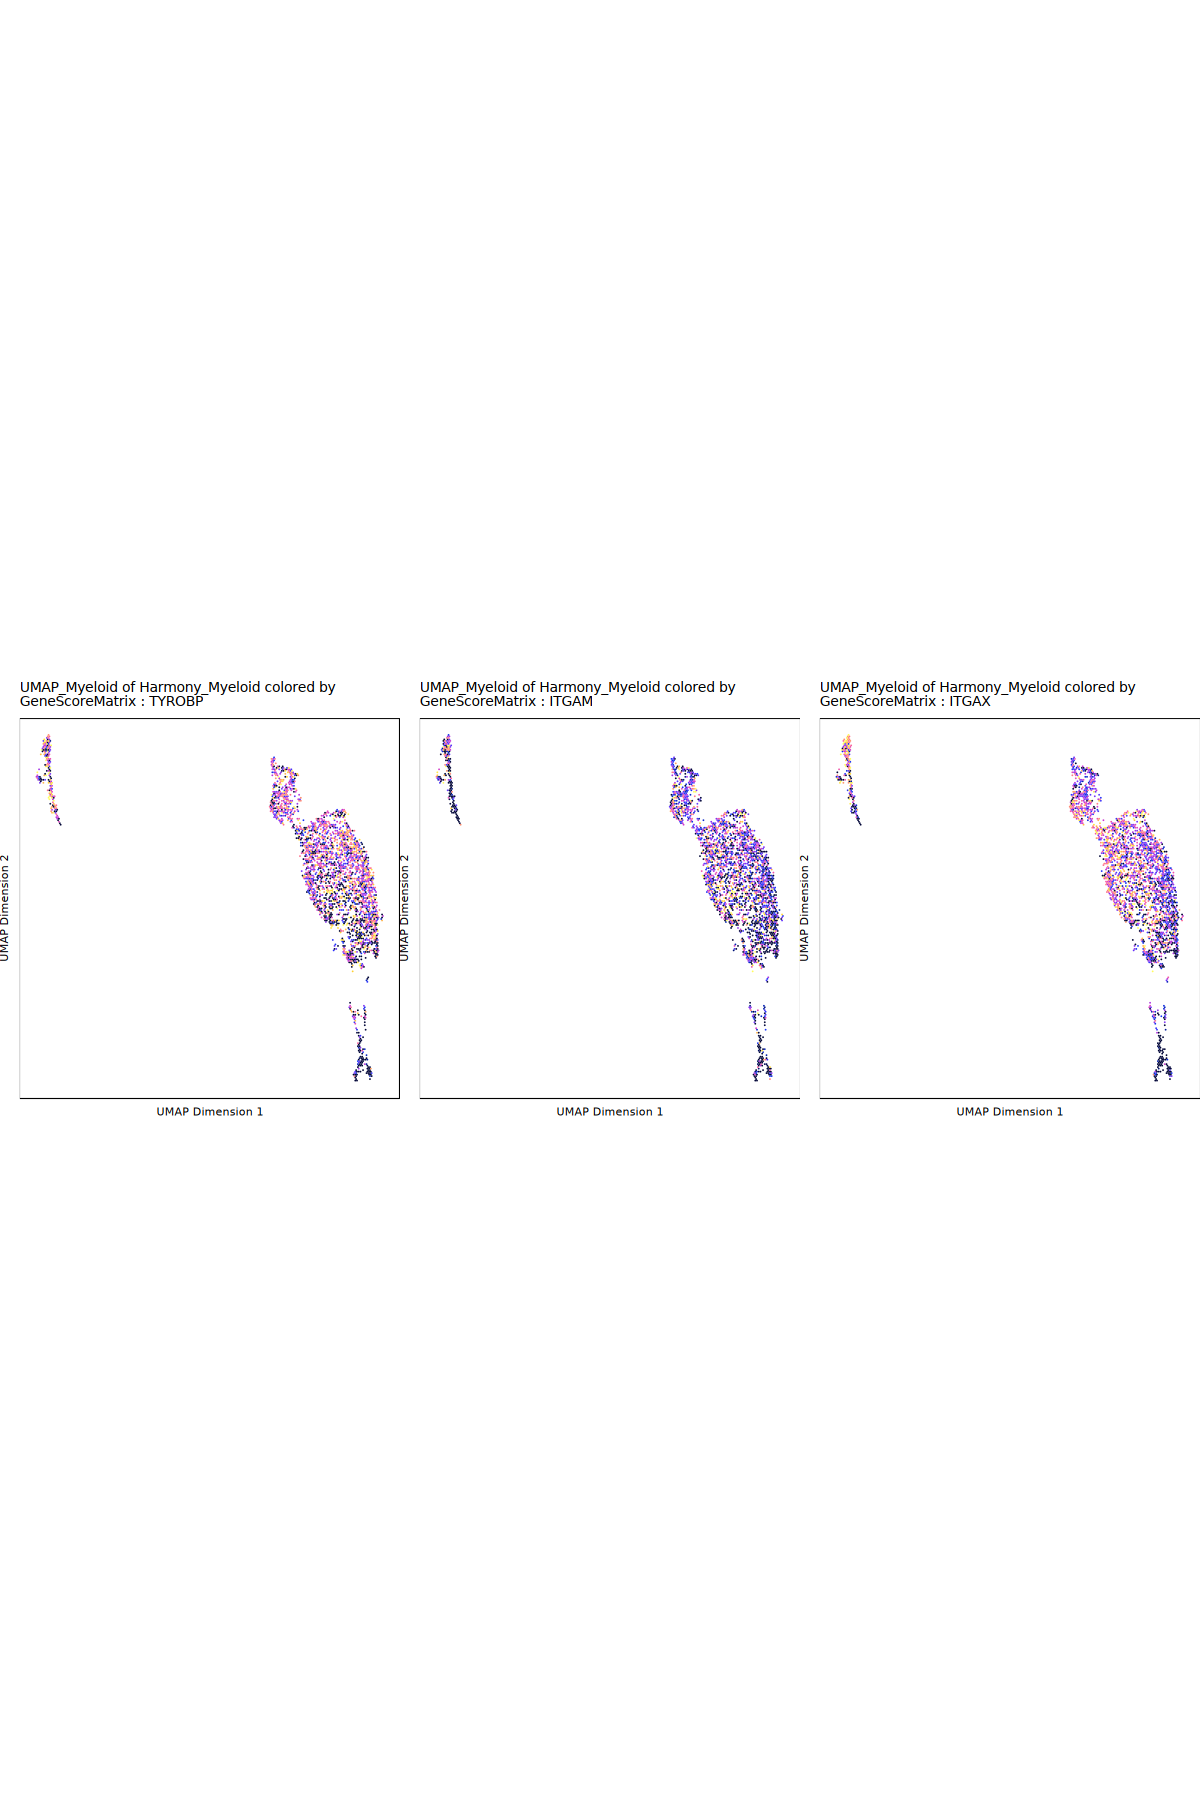

In [13]:
# 髓系标志物，检验分群
markerGenes <- c(
  "TYROBP", "ITGAM", "ITGAX"
)

# 基因得分UMAP可视化
p <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP_Myeloid",
    quantCut = c(0.01, 0.95),
    imputeWeights = NULL
)
options(repr.plot.height = 15, repr.plot.width = 10)
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-bb68e64cf8105-Date-2025-03-21_Time-11-48-00.127535.log
If there is an issue, please report to github with logFile!



Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2025-03-21 11:48:00.433277 : 



Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-bb68e64cf8105-Date-2025-03-21_Time-11-48-00.127535.log



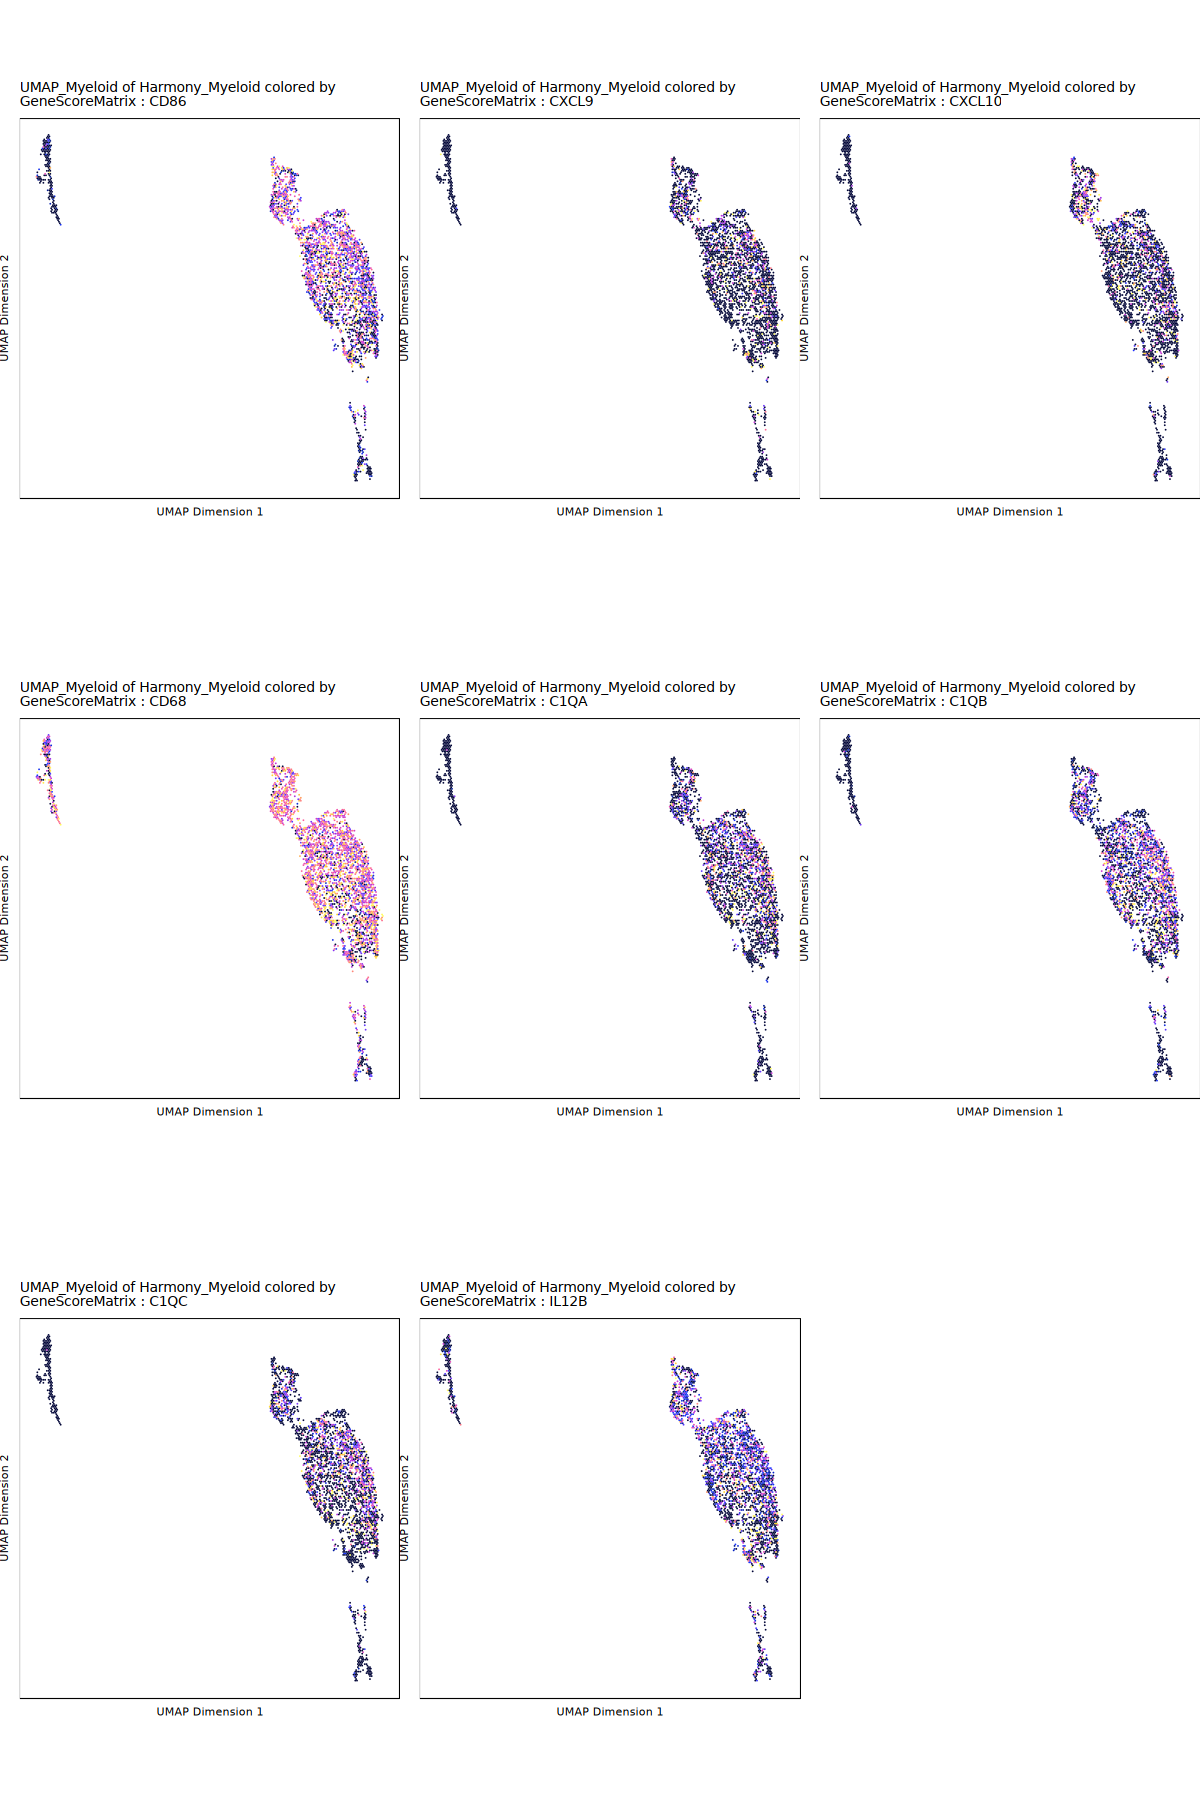

In [14]:
# 巨噬细胞M1
markerGenes <- c(
  "CD86", "CXCL9", "CXCL10", "CD68", "C1QA", "C1QB", "C1QC", "IL12B"
)

# 基因得分UMAP可视化
p <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP_Myeloid",
    quantCut = c(0.01, 0.95),
    imputeWeights = NULL
)
options(repr.plot.height = 15, repr.plot.width = 10)
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-bb68e6bc5ade2-Date-2025-03-21_Time-11-48-09.756297.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding



ColorBy = GeneScoreMatrix

Getting Matrix Values...

2025-03-21 11:48:09.984295 : 



Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-bb68e6bc5ade2-Date-2025-03-21_Time-11-48-09.756297.log



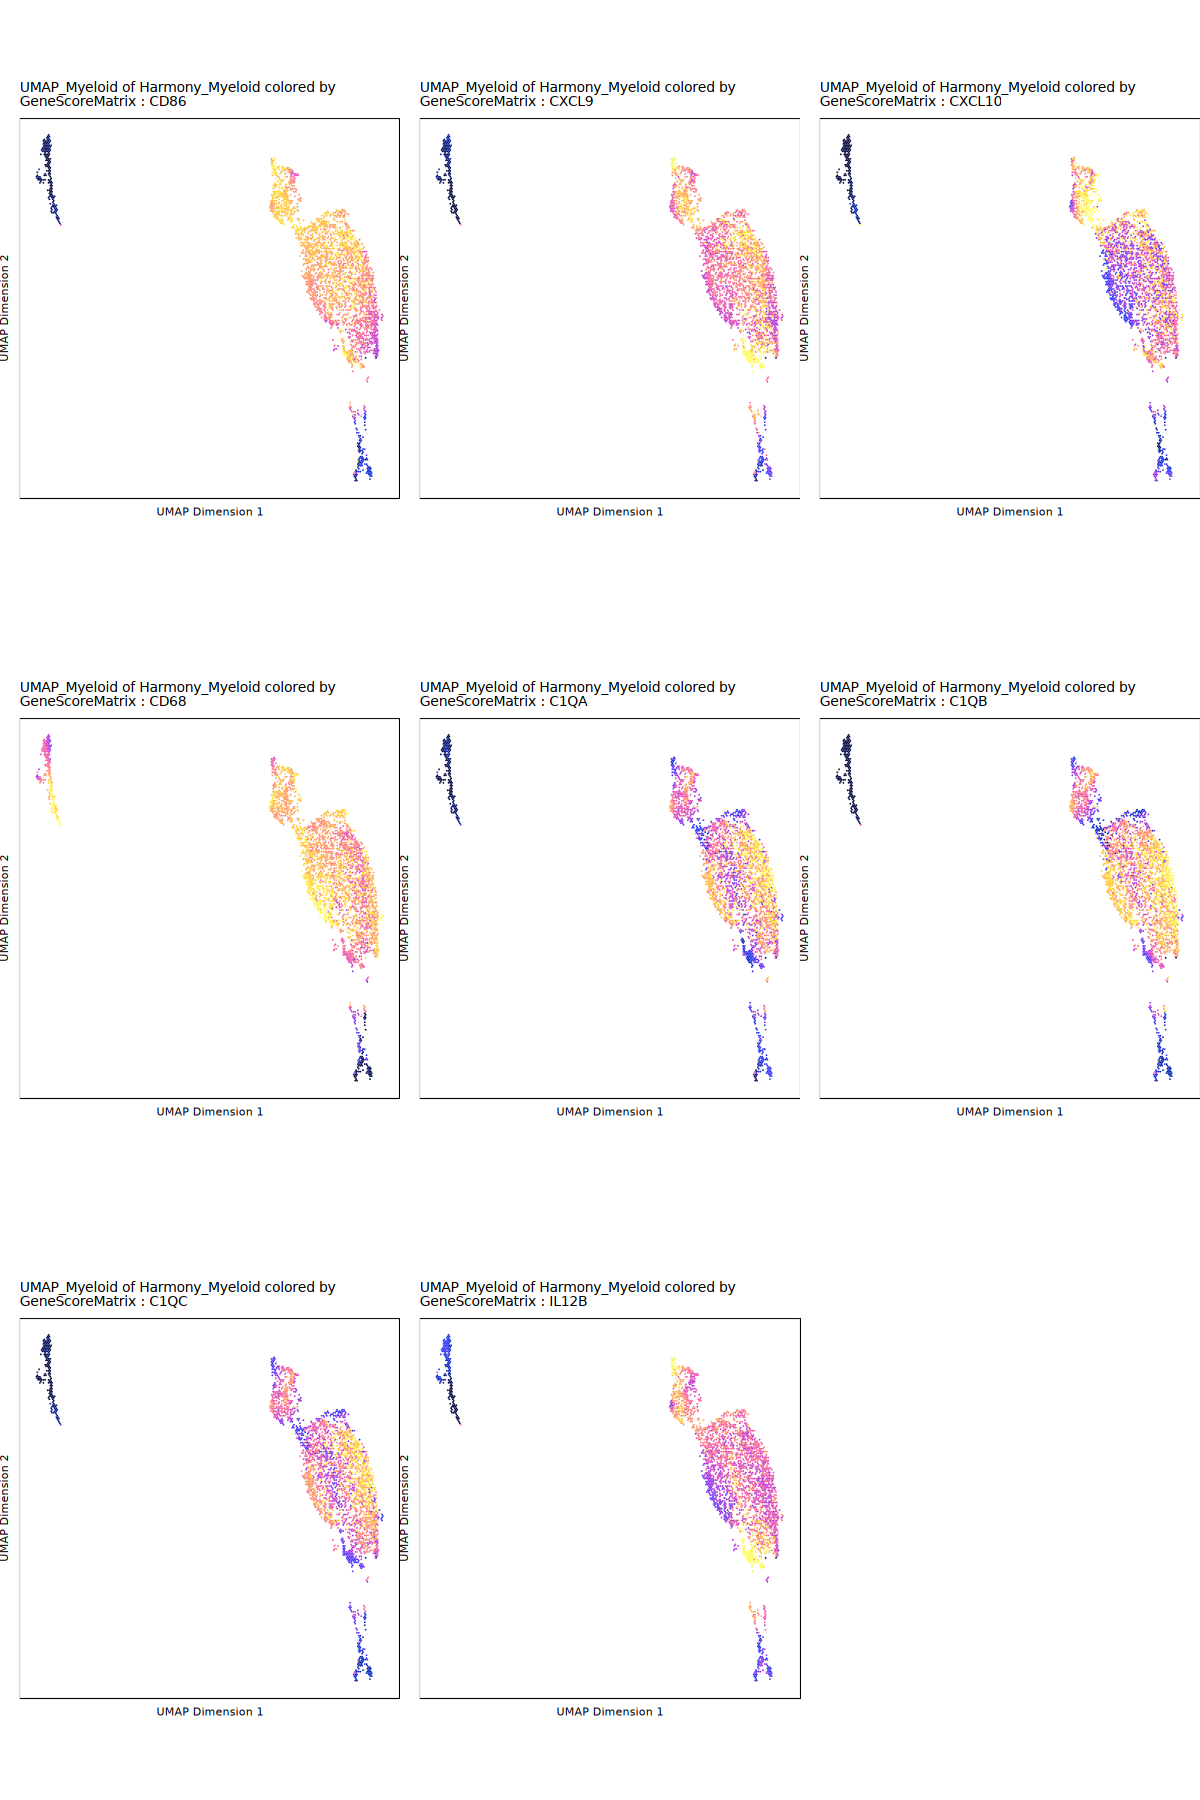

In [15]:
# 基因得分UMAP可视化
p <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP_Myeloid",
    quantCut = c(0.01, 0.95),
    imputeWeights = getImputeWeights(proj)
)
options(repr.plot.height = 15, repr.plot.width = 10)
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-bb68e7b9021ad-Date-2025-03-21_Time-11-48-20.283885.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2025-03-21 11:48:20.534873 : 





Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-bb68e7b9021ad-Date-2025-03-21_Time-11-48-20.283885.log



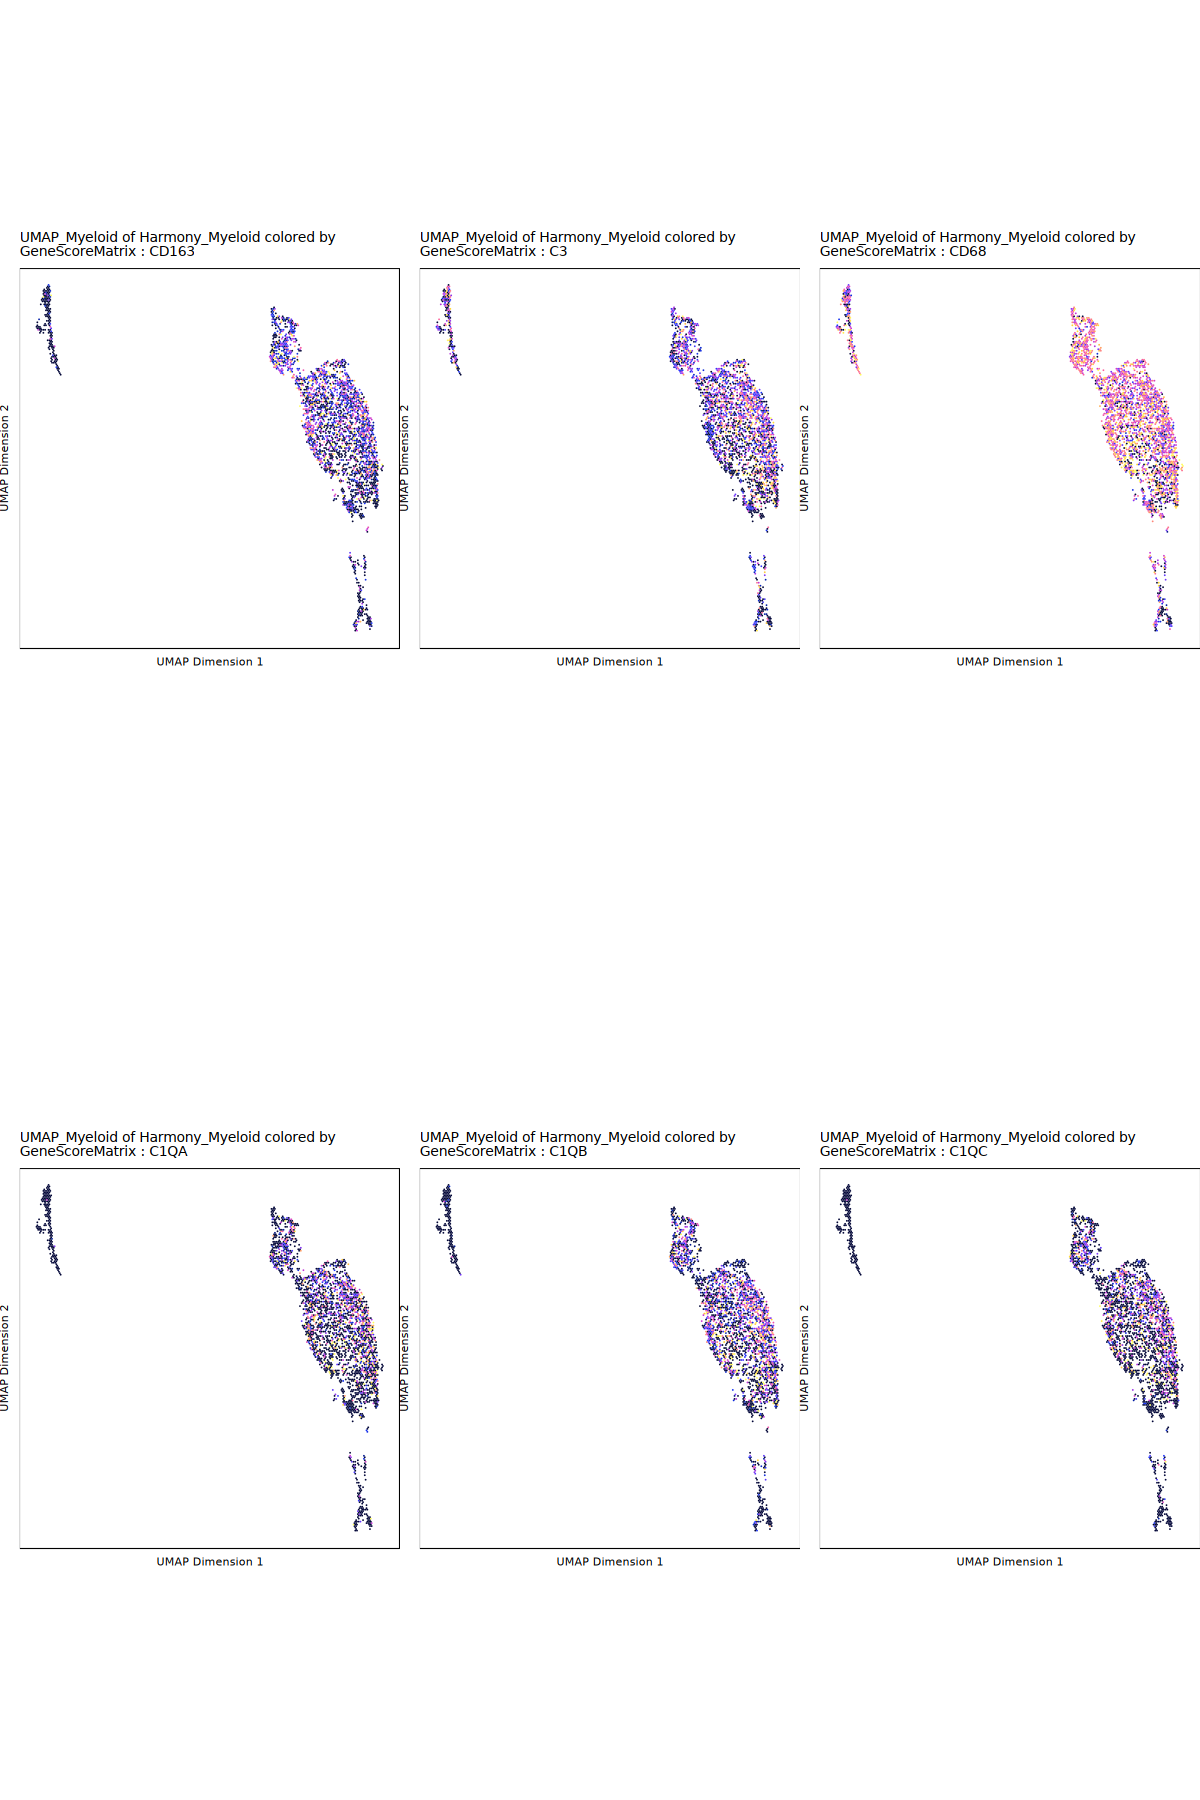

In [16]:
# 巨噬细胞M2
markerGenes <- c(
  "CD163", "C3", "CD68", "C1QA", "C1QB", "C1QC"
)

# 基因得分UMAP可视化
p <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP_Myeloid",
    quantCut = c(0.01, 0.95),
    imputeWeights = NULL
)
options(repr.plot.height = 15, repr.plot.width = 10)
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-bb68e31c4497c-Date-2025-03-21_Time-11-48-29.123857.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding



ColorBy = GeneScoreMatrix

Getting Matrix Values...

2025-03-21 11:48:29.374156 : 



Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-bb68e31c4497c-Date-2025-03-21_Time-11-48-29.123857.log



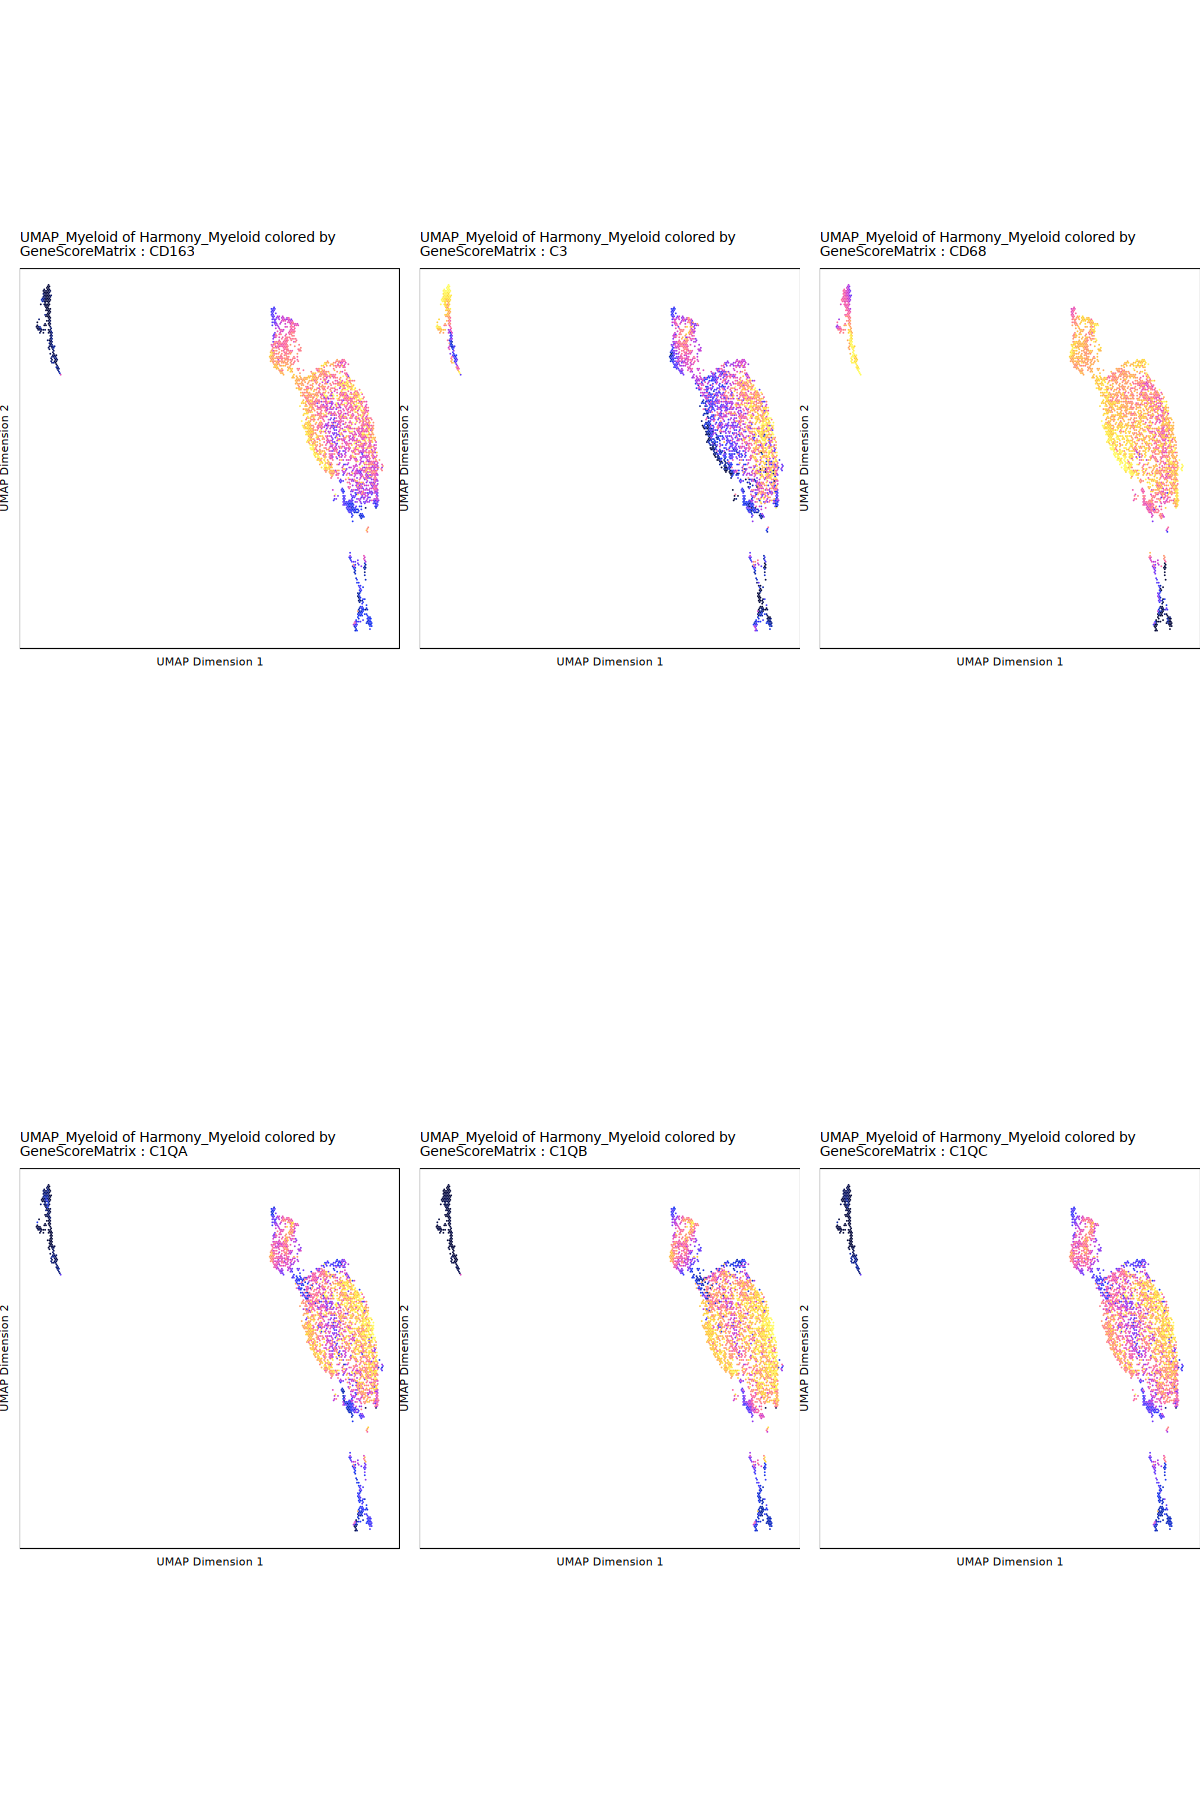

In [17]:
# 基因得分UMAP可视化
p <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP_Myeloid",
    quantCut = c(0.01, 0.95),
    imputeWeights = getImputeWeights(proj)
)
options(repr.plot.height = 15, repr.plot.width = 10)
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-bb68e7c39a2ee-Date-2025-03-21_Time-11-48-39.014723.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding



ColorBy = GeneScoreMatrix

Getting Matrix Values...

2025-03-21 11:48:39.255137 : 



Plotting Embedding

1 
2 
3 
4 
5 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-bb68e7c39a2ee-Date-2025-03-21_Time-11-48-39.014723.log



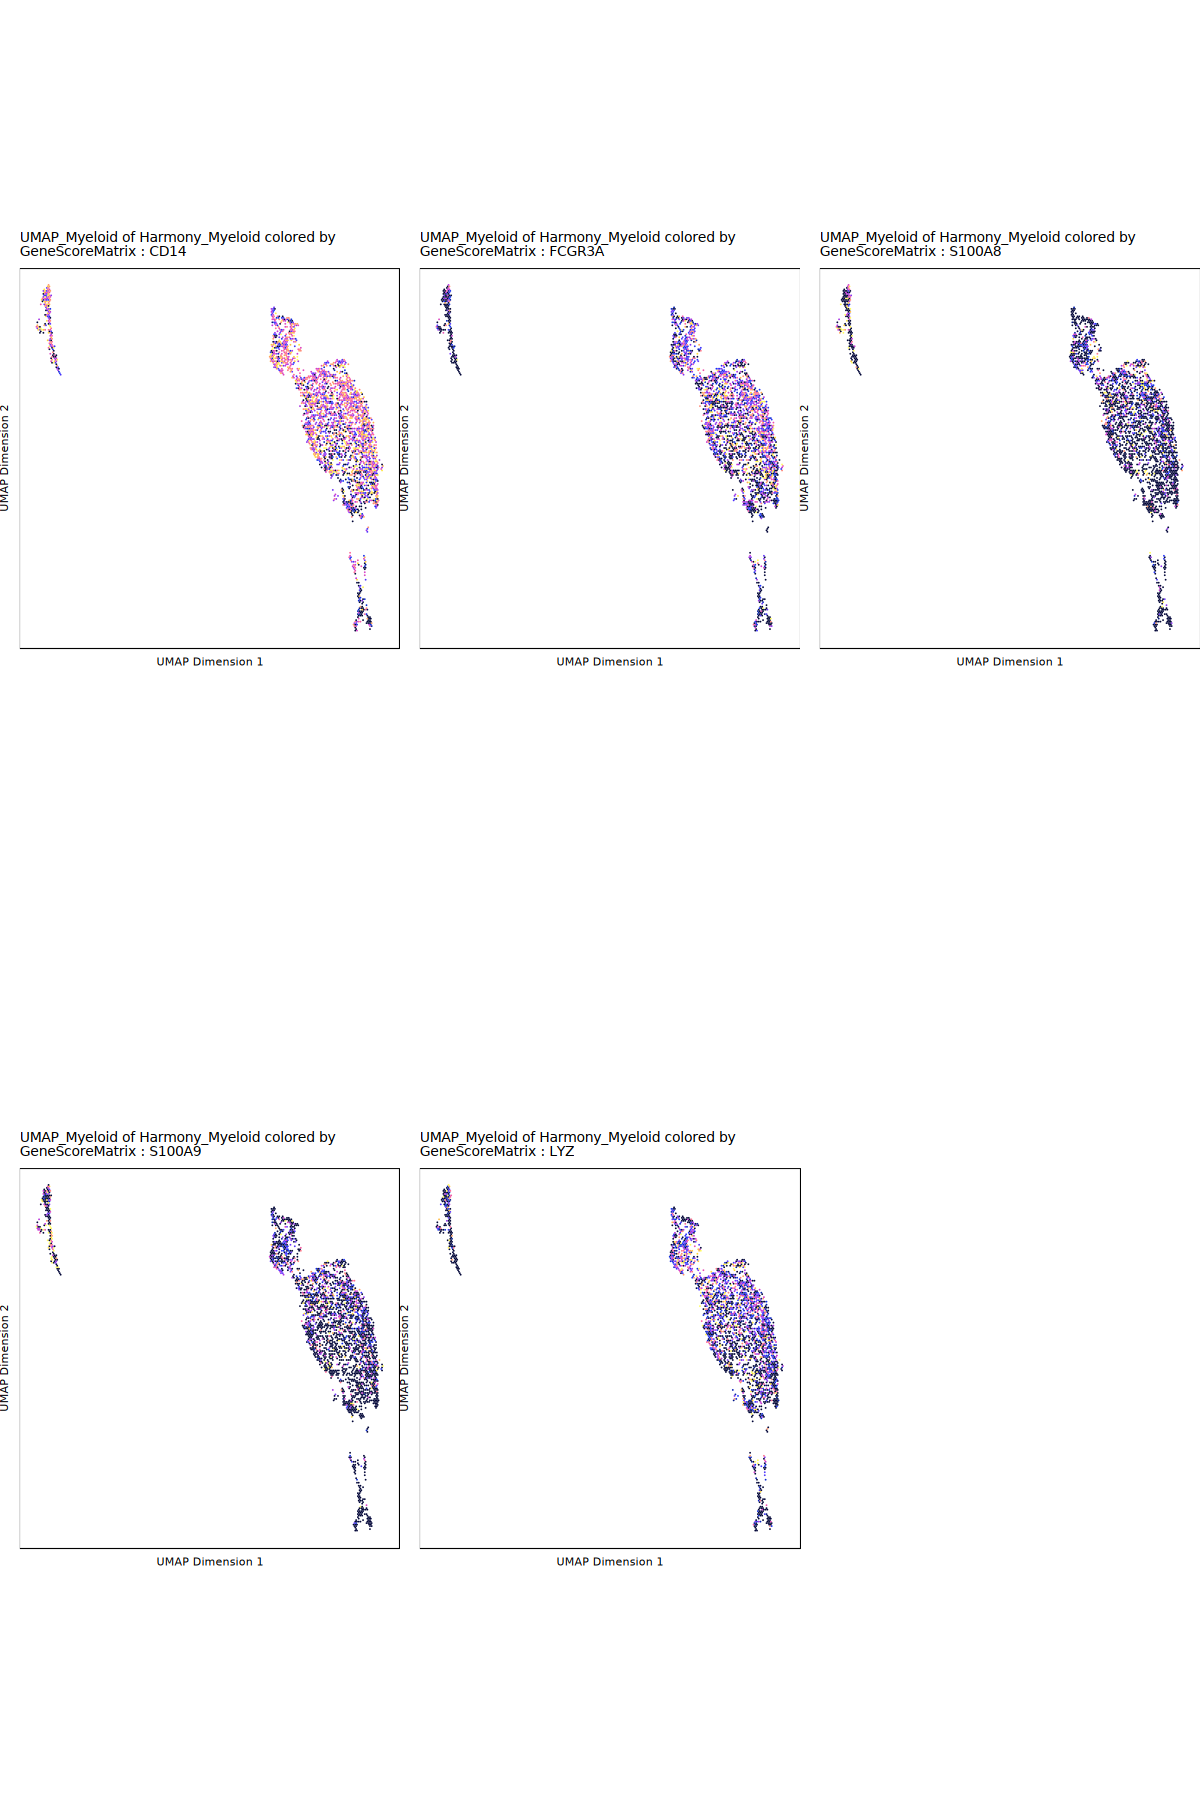

In [18]:
# 单核细胞（经典）
markerGenes <- c(
  "CD14", "FCGR3A", "S100A8", "S100A9", "LYZ"
)

# 基因得分UMAP可视化
p <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP_Myeloid",
    quantCut = c(0.01, 0.95),
    imputeWeights = NULL
)
options(repr.plot.height = 15, repr.plot.width = 10)
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-bb68e13a6a44e-Date-2025-03-21_Time-11-48-46.374454.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding



ColorBy = GeneScoreMatrix

Getting Matrix Values...

2025-03-21 11:48:46.610934 : 



Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 
2 
3 
4 
5 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-bb68e13a6a44e-Date-2025-03-21_Time-11-48-46.374454.log



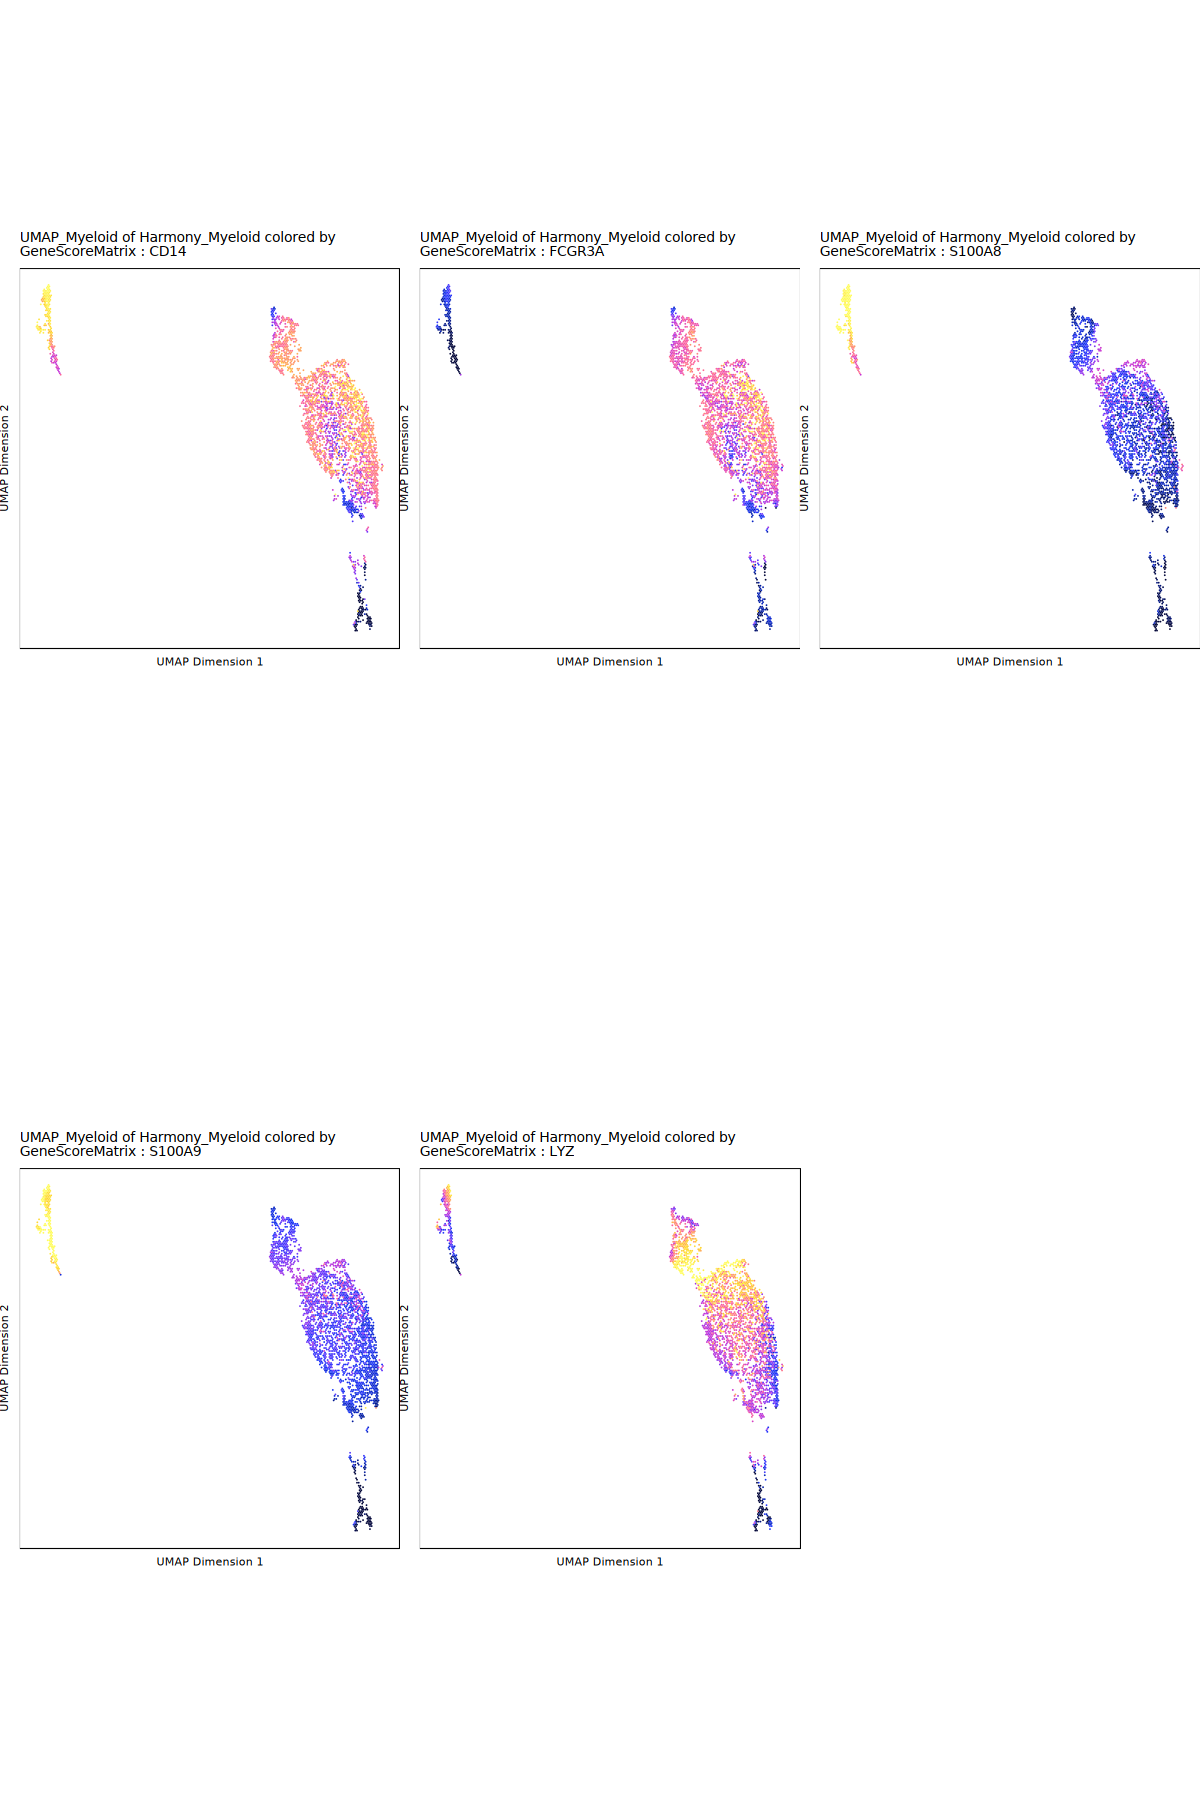

In [19]:
# 基因得分UMAP可视化
p <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP_Myeloid",
    quantCut = c(0.01, 0.95),
    imputeWeights = getImputeWeights(proj)
)
options(repr.plot.height = 15, repr.plot.width = 10)
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-bb68e24b3651c-Date-2025-03-21_Time-11-48-54.648472.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding



ColorBy = GeneScoreMatrix

Getting Matrix Values...

2025-03-21 11:48:54.897268 : 



Plotting Embedding

1 
2 
3 
4 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-bb68e24b3651c-Date-2025-03-21_Time-11-48-54.648472.log



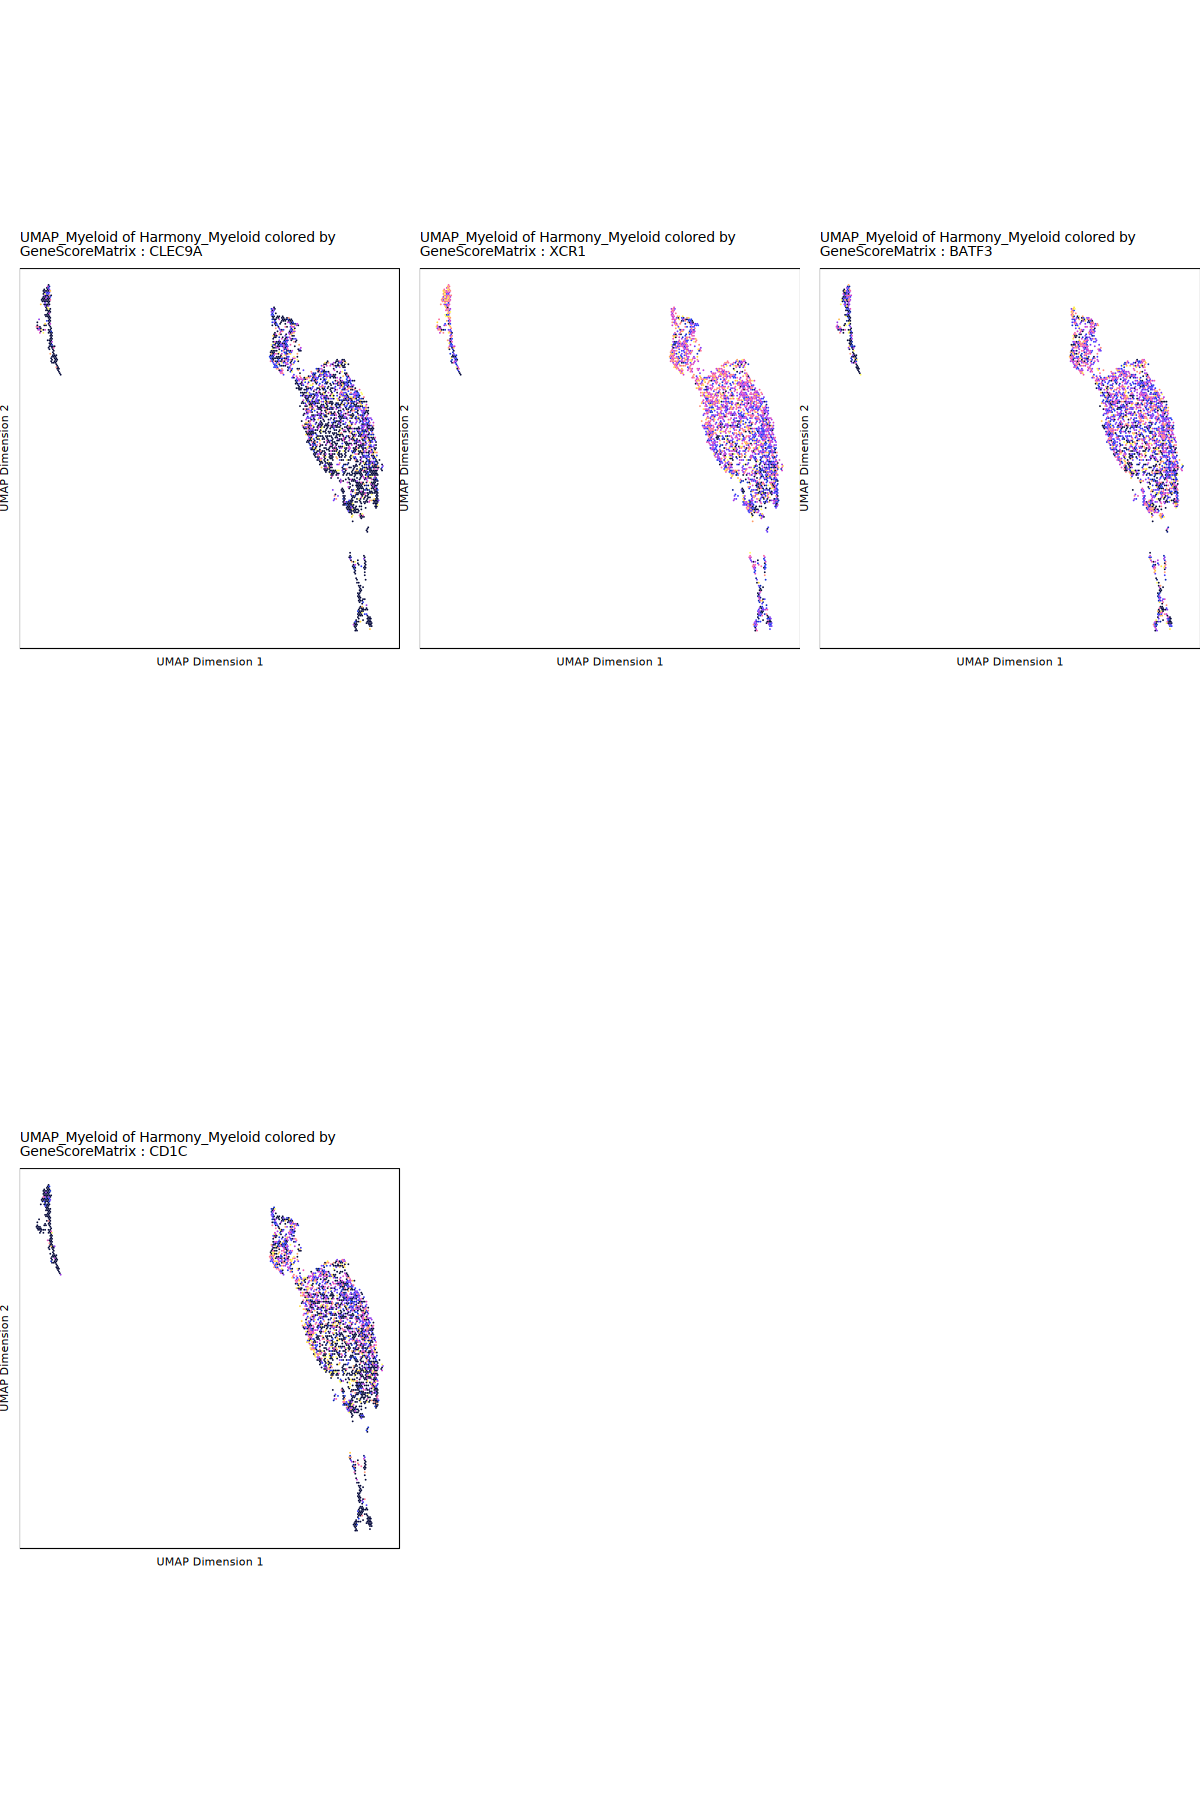

In [20]:
# 树突状细胞cDC1
markerGenes <- c(
  "CLEC9A", "XCR1", "BATF3", "CD1C"
)

# 基因得分UMAP可视化
p <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP_Myeloid",
    quantCut = c(0.01, 0.95),
    imputeWeights = NULL
)
options(repr.plot.height = 15, repr.plot.width = 10)
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-bb68e2ede49fa-Date-2025-03-21_Time-11-49-01.857704.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding



ColorBy = GeneScoreMatrix

Getting Matrix Values...

2025-03-21 11:49:02.118984 : 



Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 
2 
3 
4 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-bb68e2ede49fa-Date-2025-03-21_Time-11-49-01.857704.log



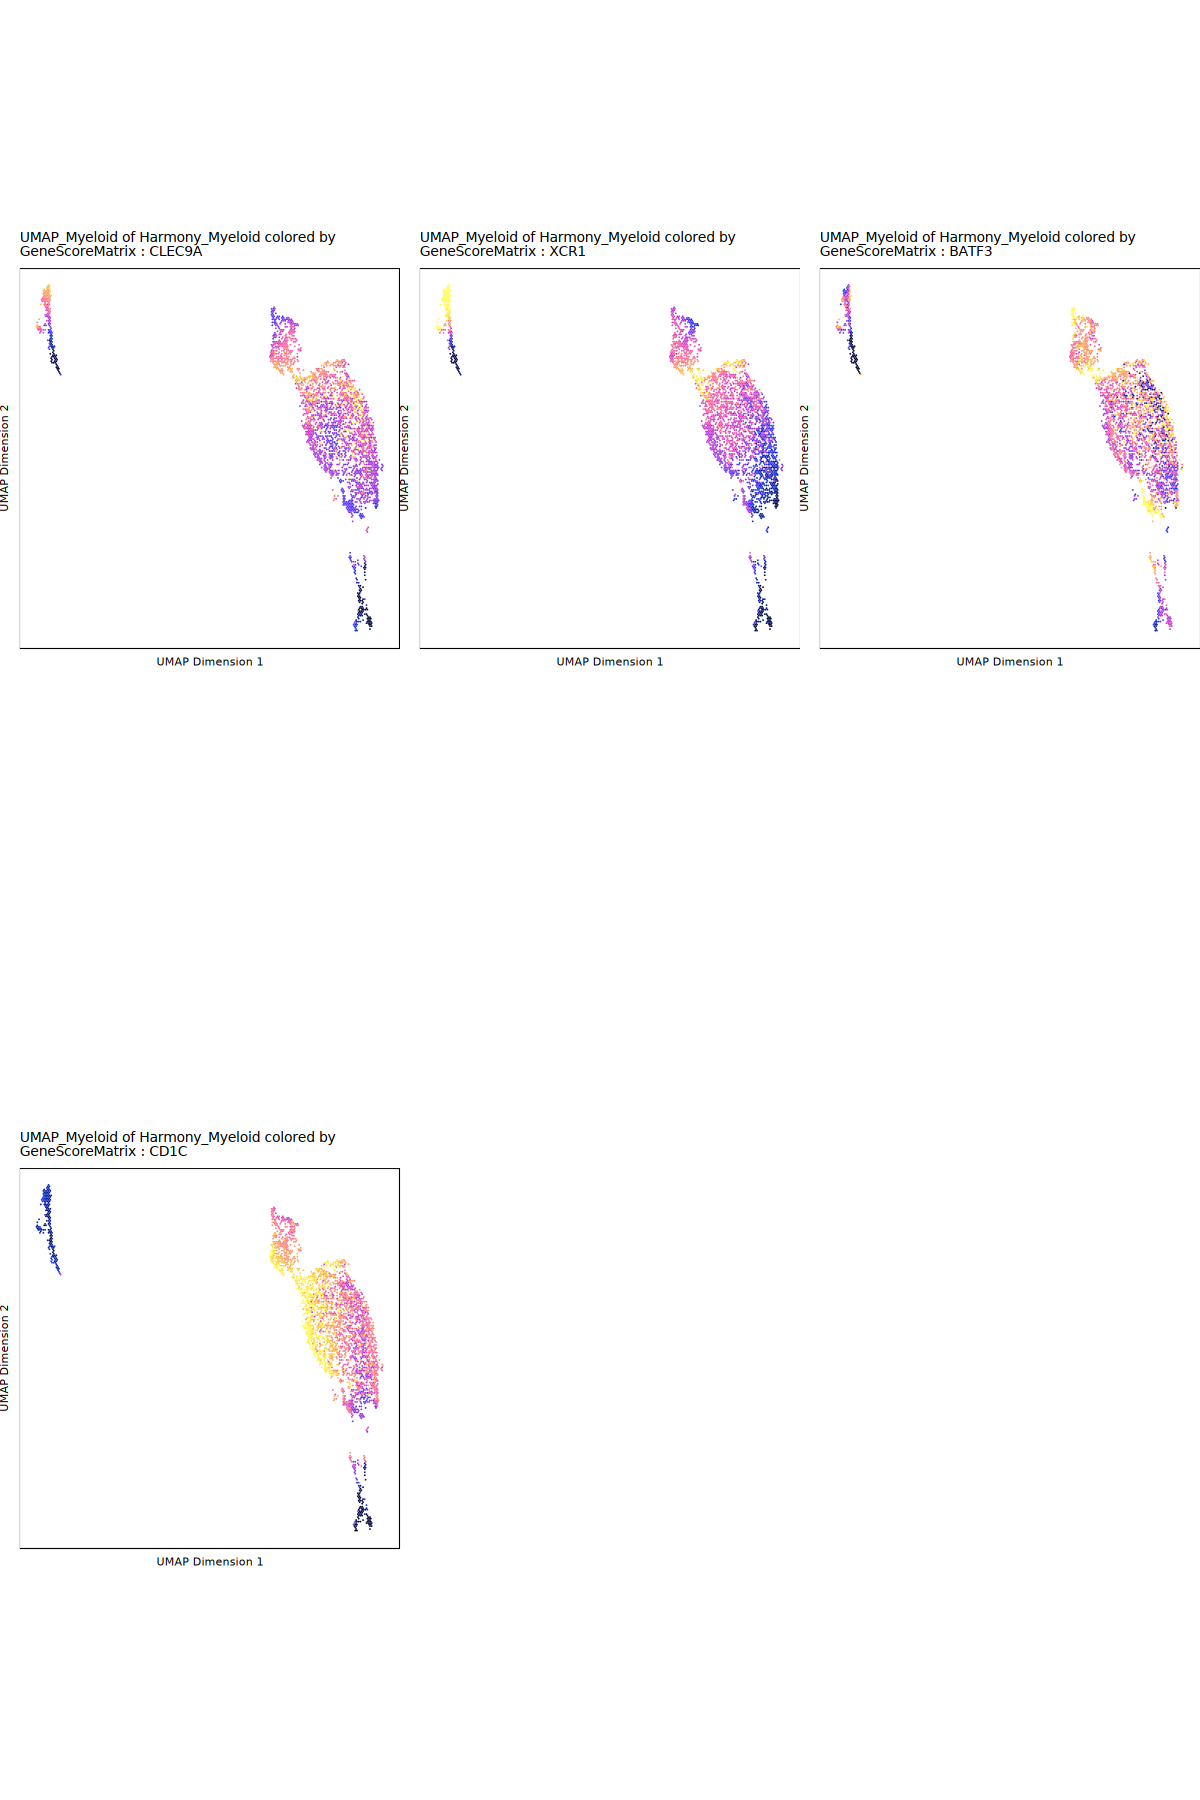

In [21]:
# 基因得分UMAP可视化
p <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP_Myeloid",
    quantCut = c(0.01, 0.95),
    imputeWeights = getImputeWeights(proj)
)
options(repr.plot.height = 15, repr.plot.width = 10)
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-bb68e2dacb161-Date-2025-03-21_Time-11-49-09.873796.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding



ColorBy = GeneScoreMatrix

Getting Matrix Values...

2025-03-21 11:49:10.103209 : 



Plotting Embedding

1 
2 
3 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-bb68e2dacb161-Date-2025-03-21_Time-11-49-09.873796.log



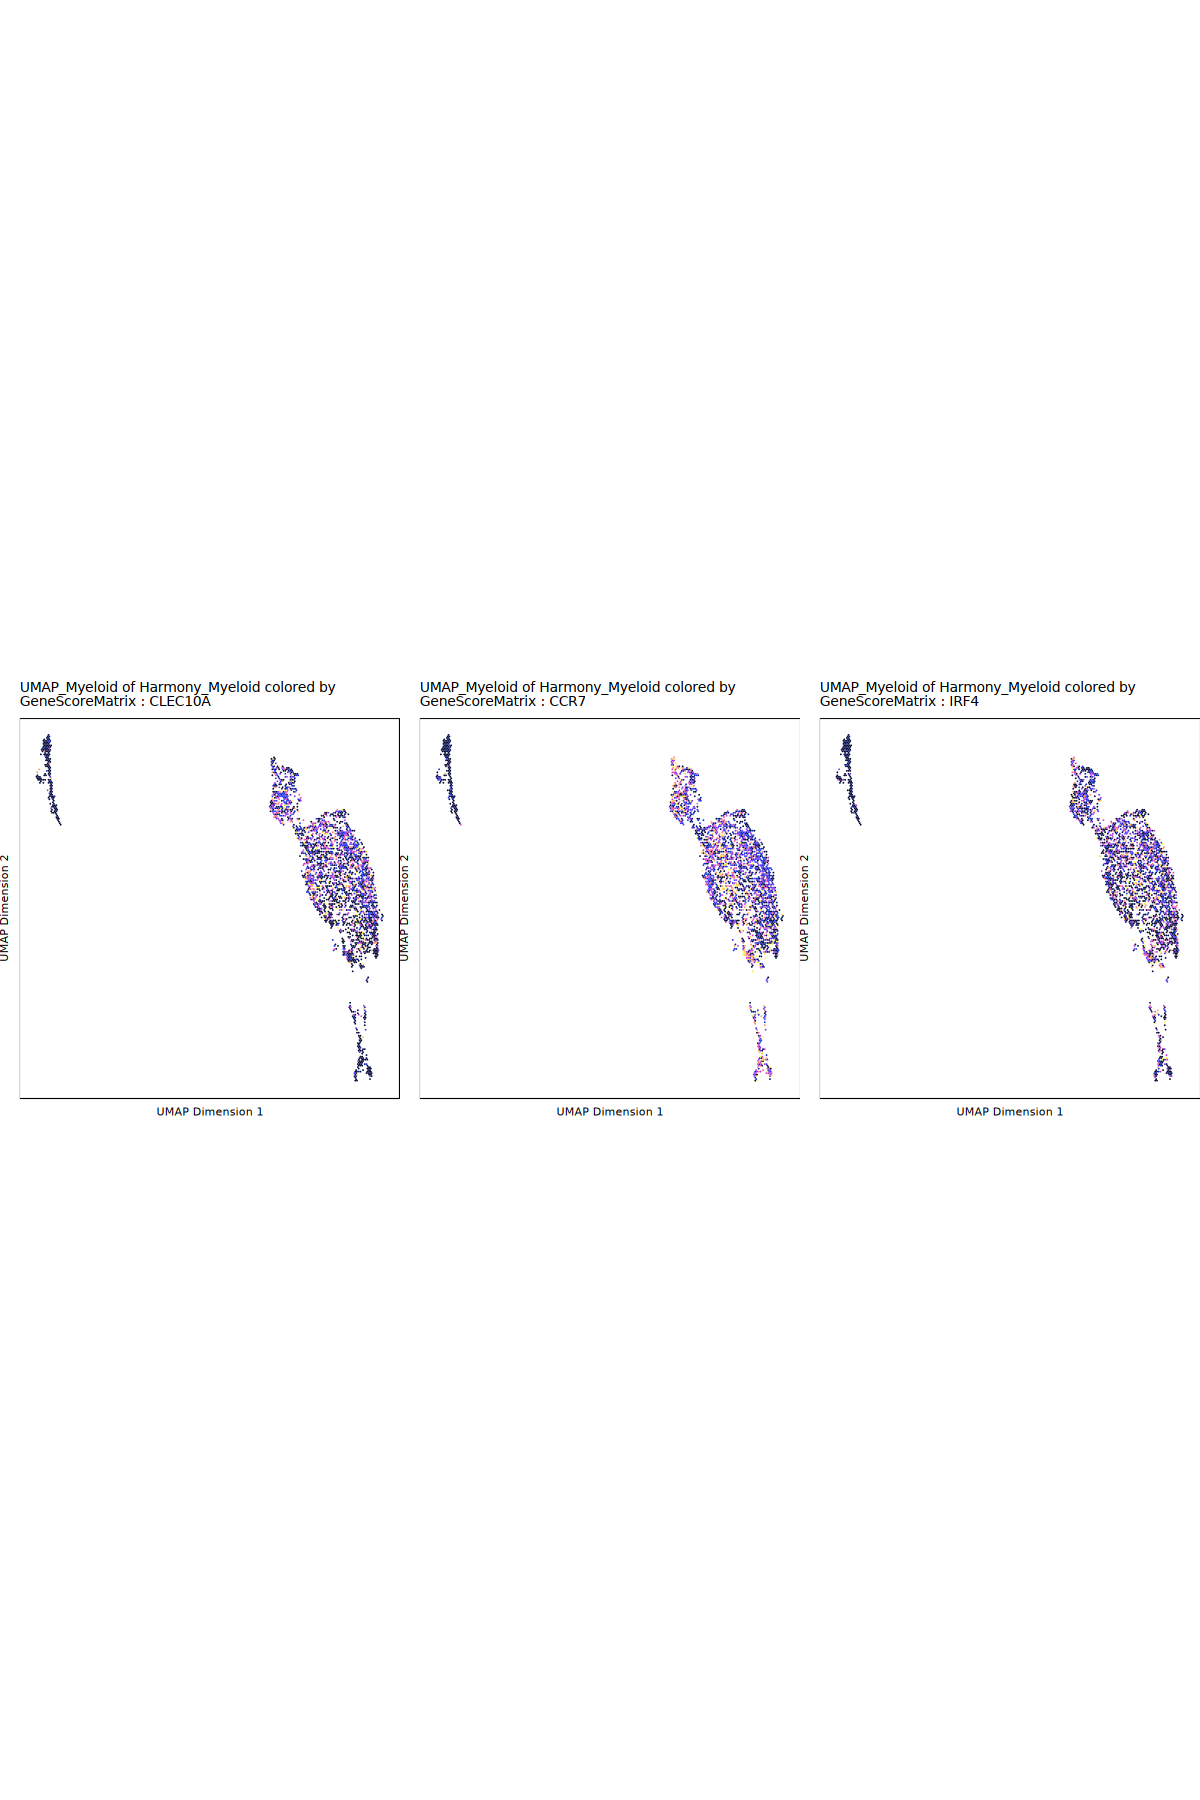

In [22]:
# 树突状细胞cDC2
markerGenes <- c(
  "CLEC10A", "CCR7", "IRF4"
)

# 基因得分UMAP可视化
p <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP_Myeloid",
    quantCut = c(0.01, 0.95),
    imputeWeights = NULL
)
options(repr.plot.height = 15, repr.plot.width = 10)
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-bb68e2a6962be-Date-2025-03-21_Time-11-49-15.146367.log
If there is an issue, please report to github with logFile!



Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2025-03-21 11:49:15.383392 : 



Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 
2 
3 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-bb68e2a6962be-Date-2025-03-21_Time-11-49-15.146367.log



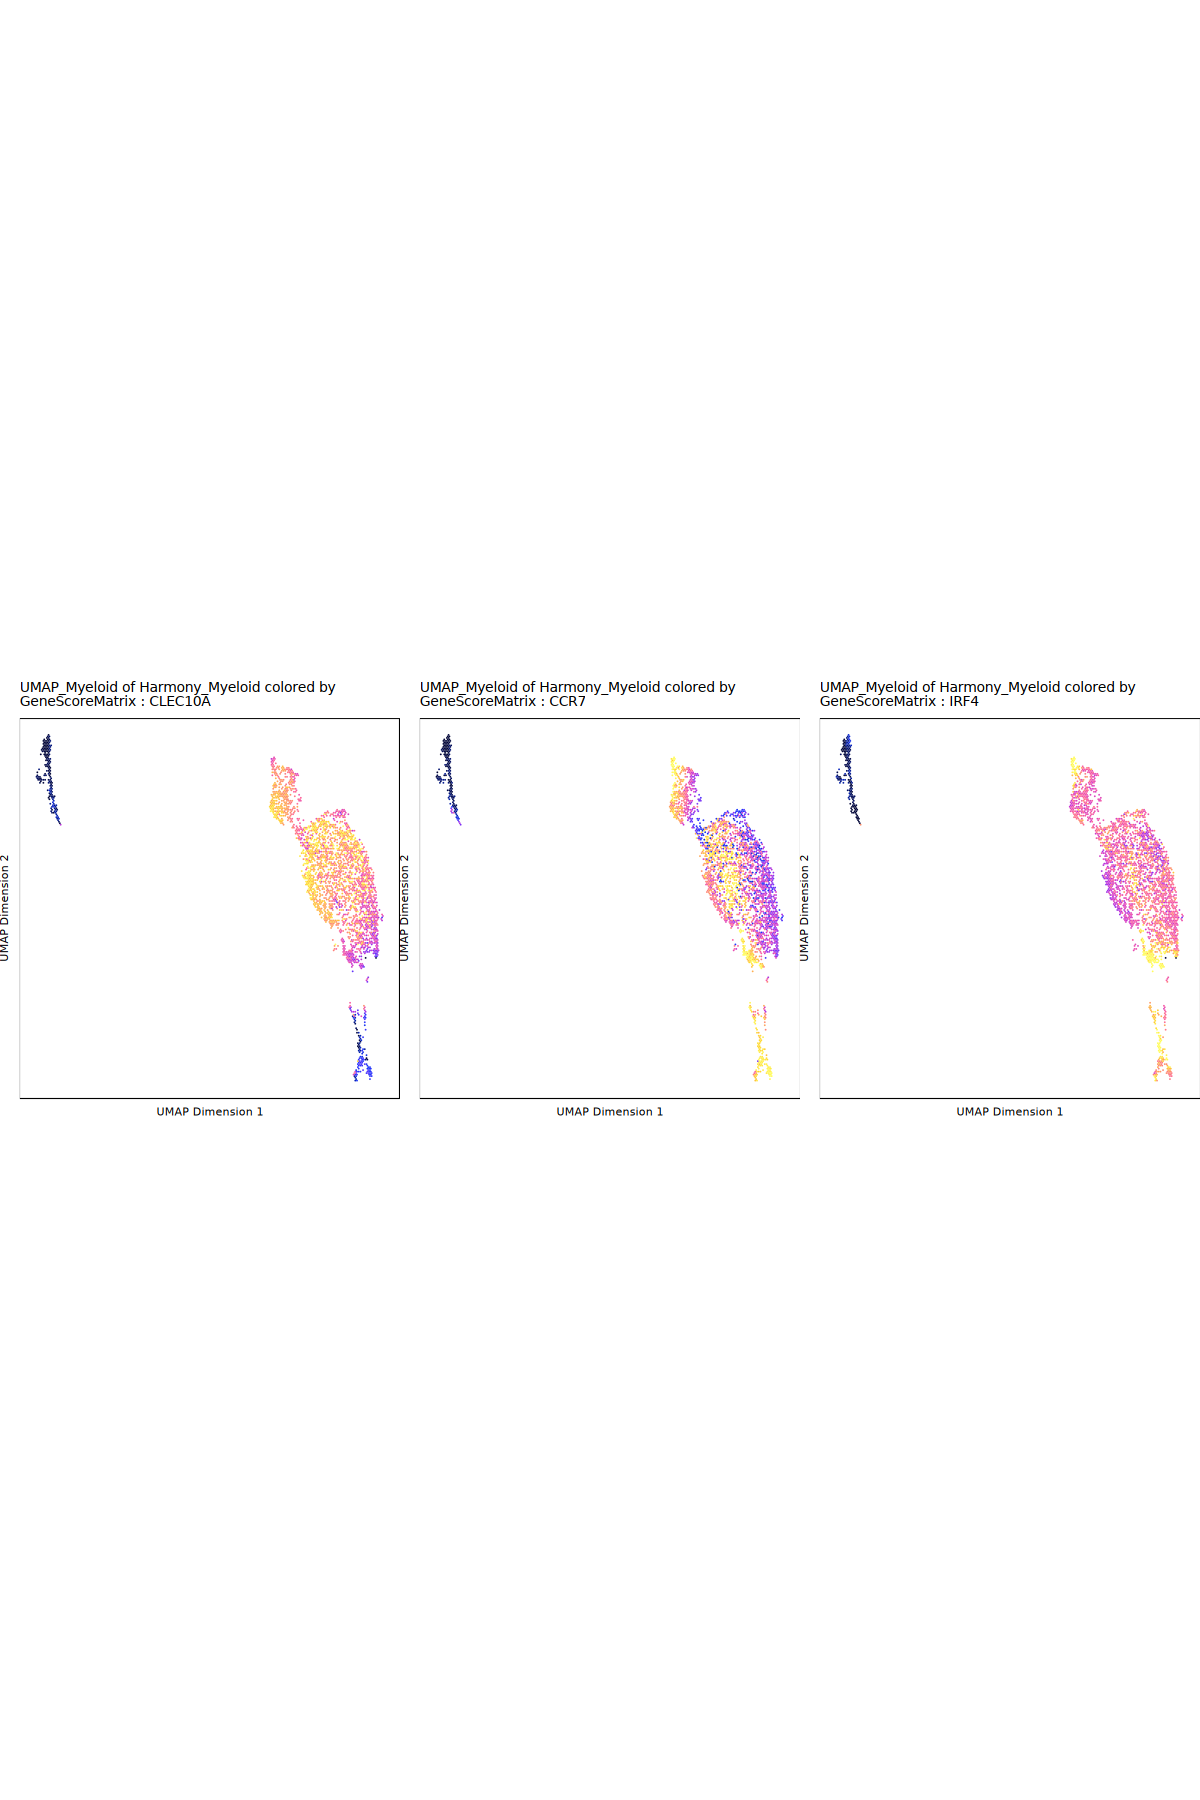

In [23]:
# 基因得分UMAP可视化
p <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP_Myeloid",
    quantCut = c(0.01, 0.95),
    imputeWeights = getImputeWeights(proj)
)
options(repr.plot.height = 15, repr.plot.width = 10)
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-bb68e35e1414f-Date-2025-03-21_Time-11-49-21.014611.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding



ColorBy = GeneScoreMatrix

Getting Matrix Values...

2025-03-21 11:49:21.239977 : 



Plotting Embedding

1 
2 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-bb68e35e1414f-Date-2025-03-21_Time-11-49-21.014611.log



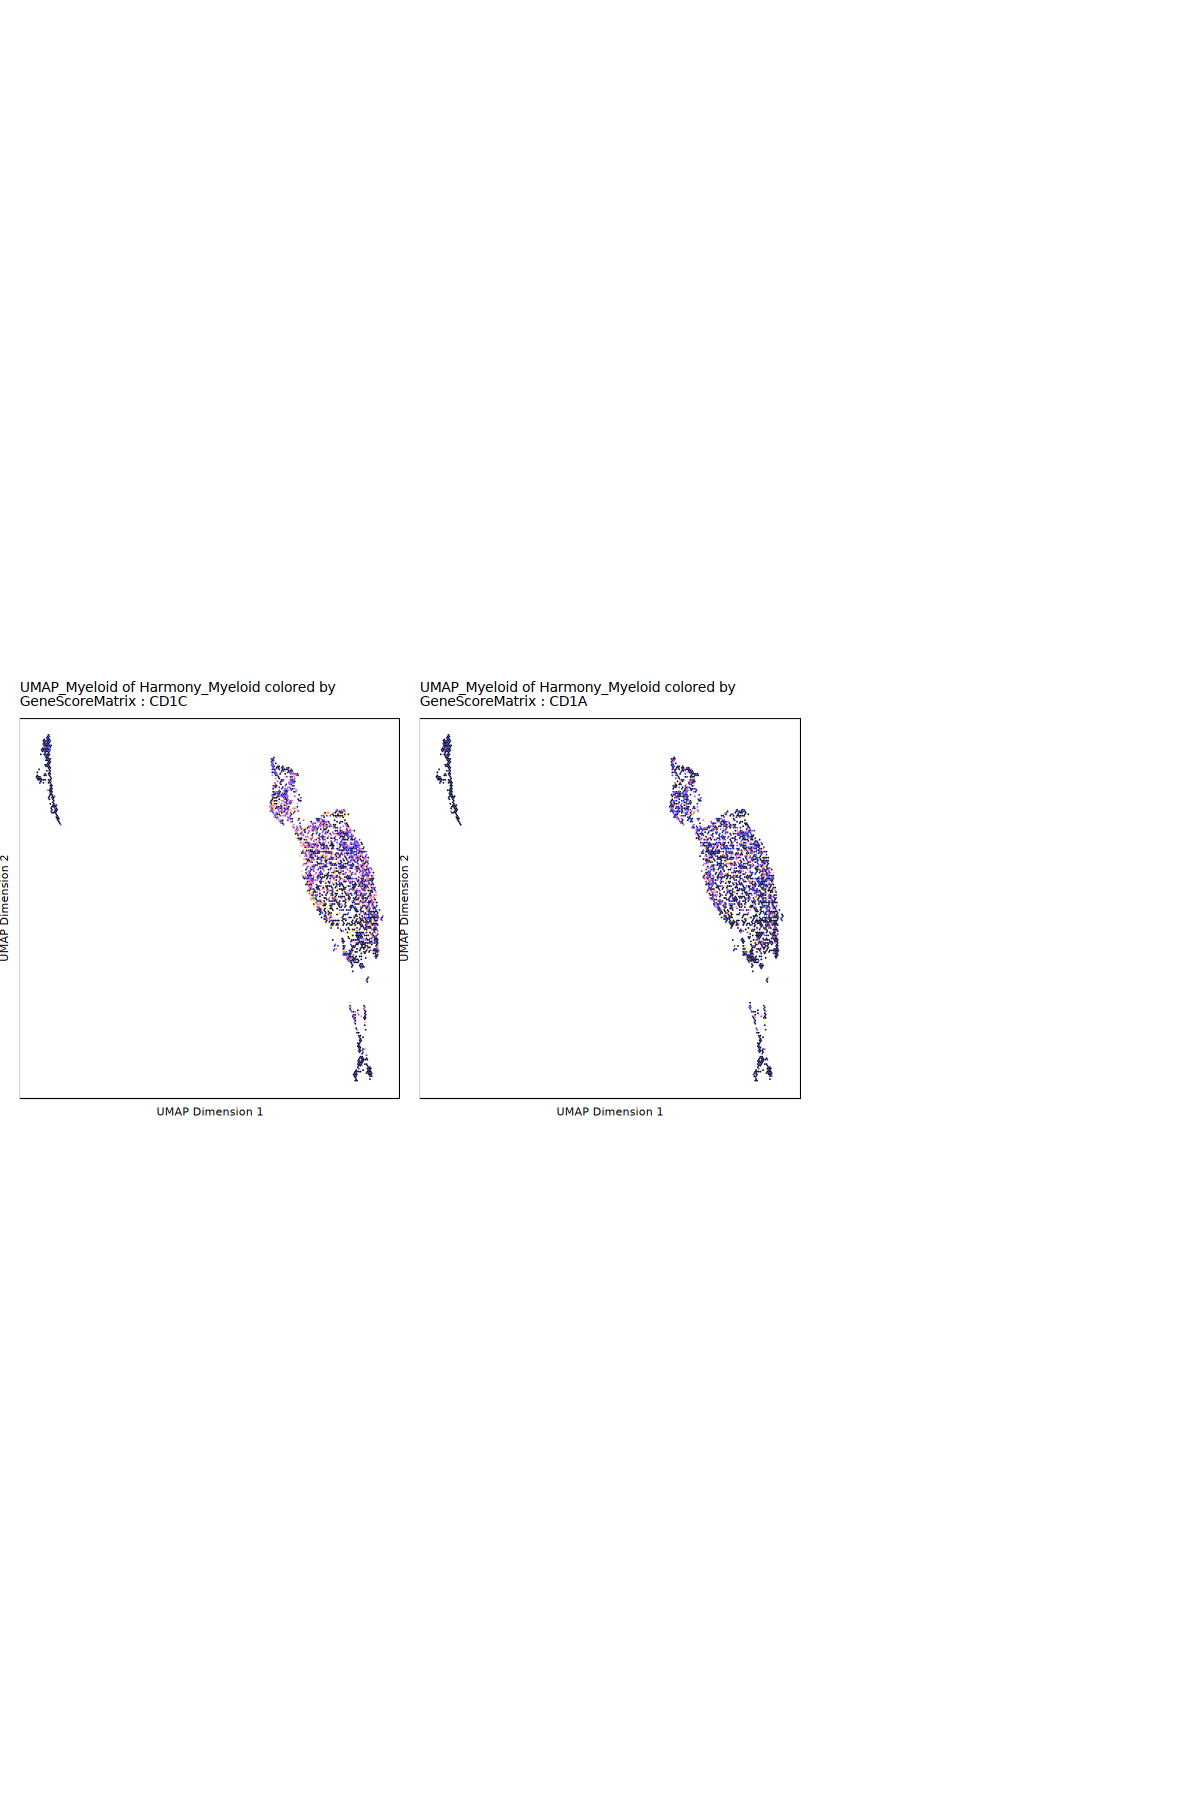

In [24]:
# 树突状细胞cDC3
markerGenes <- c(
  "CD1C", "CD1A"
)

# 基因得分UMAP可视化
p <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP_Myeloid",
    quantCut = c(0.01, 0.95),
    imputeWeights = NULL
)
options(repr.plot.height = 15, repr.plot.width = 10)
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-bb68e3be7b951-Date-2025-03-21_Time-11-49-25.393265.log
If there is an issue, please report to github with logFile!



Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2025-03-21 11:49:25.63556 : 



R_zmq_msg_send errno: 4 strerror: Interrupted system call




Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 
2 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-bb68e3be7b951-Date-2025-03-21_Time-11-49-25.393265.log



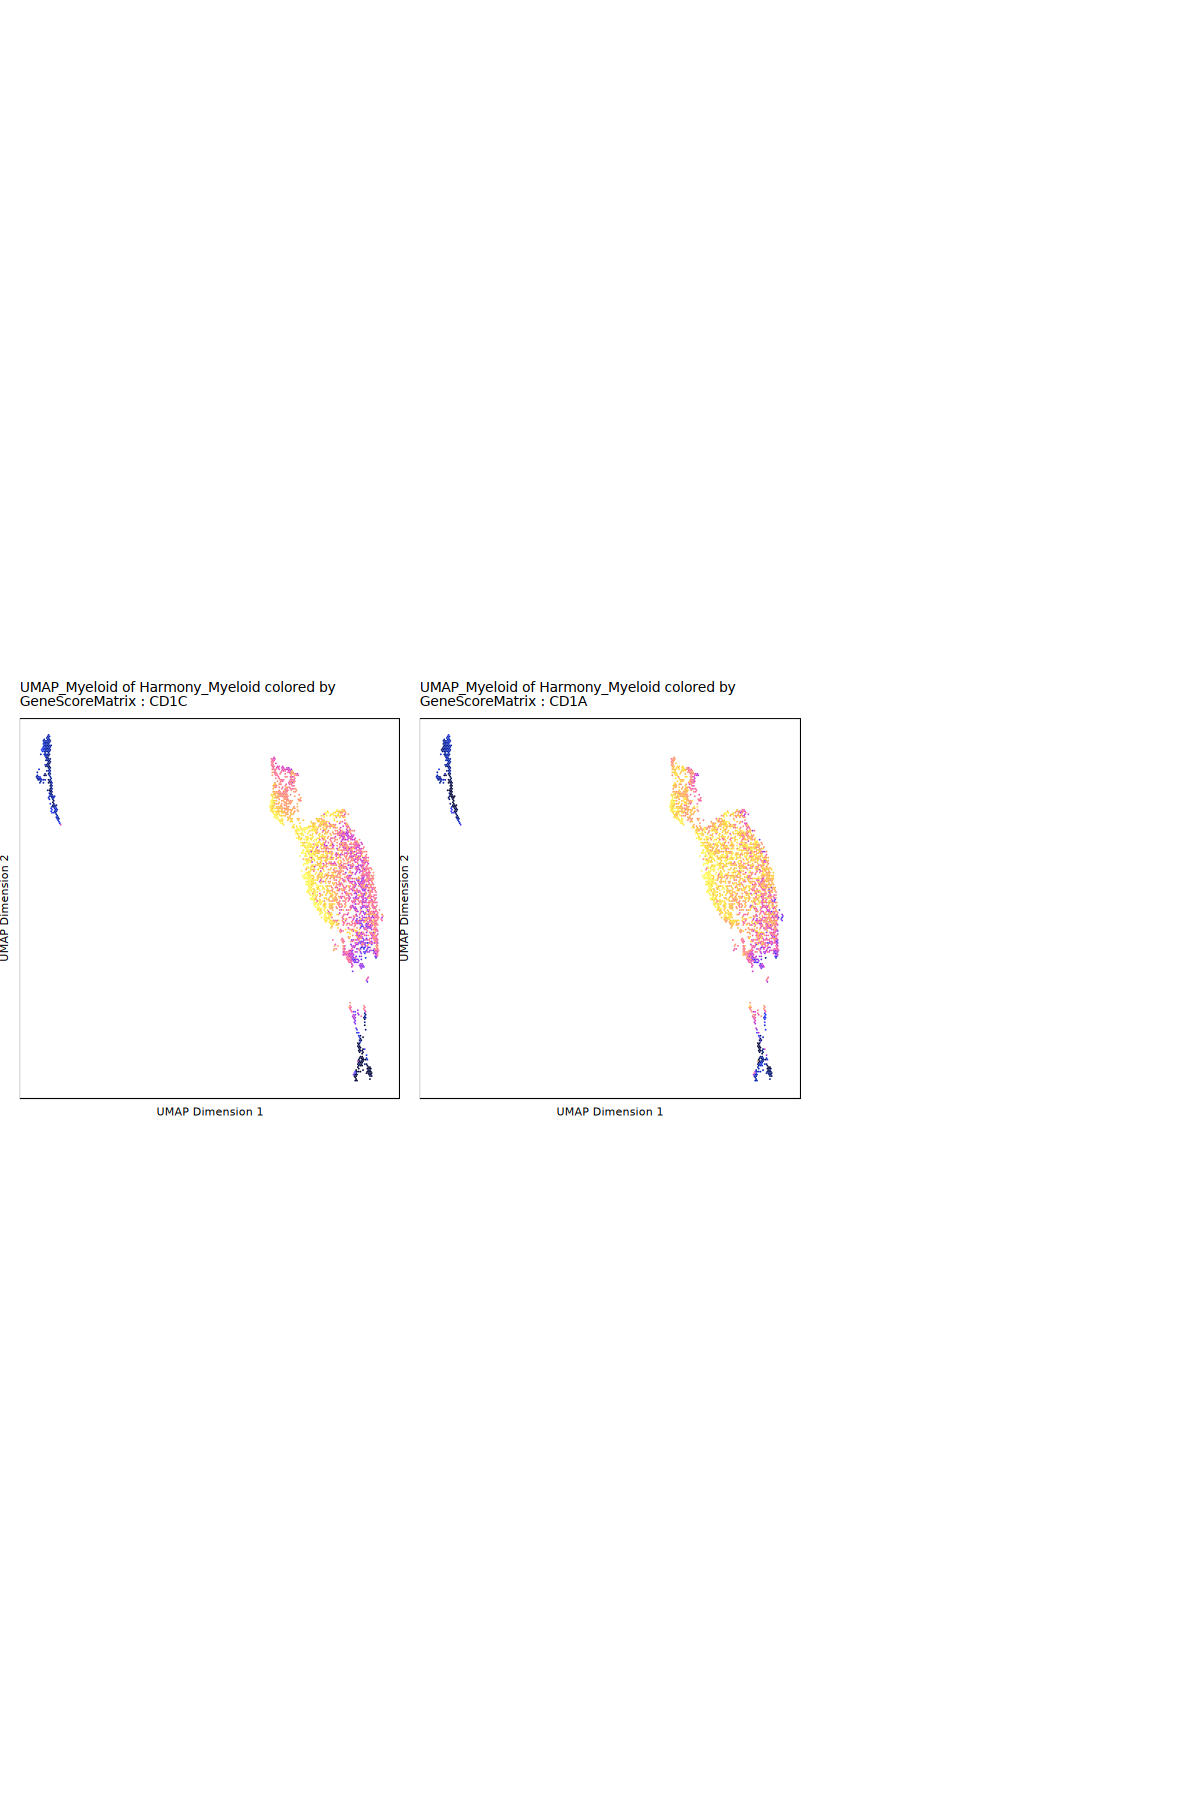

In [25]:
# 基因得分UMAP可视化
p <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP_Myeloid",
    quantCut = c(0.01, 0.95),
    imputeWeights = getImputeWeights(proj)
)
options(repr.plot.height = 15, repr.plot.width = 10)
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-bb68e65a1866a-Date-2025-03-21_Time-11-49-30.86913.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding



ColorBy = GeneScoreMatrix

Getting Matrix Values...

2025-03-21 11:49:31.099451 : 



Plotting Embedding

1 
2 
3 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-bb68e65a1866a-Date-2025-03-21_Time-11-49-30.86913.log



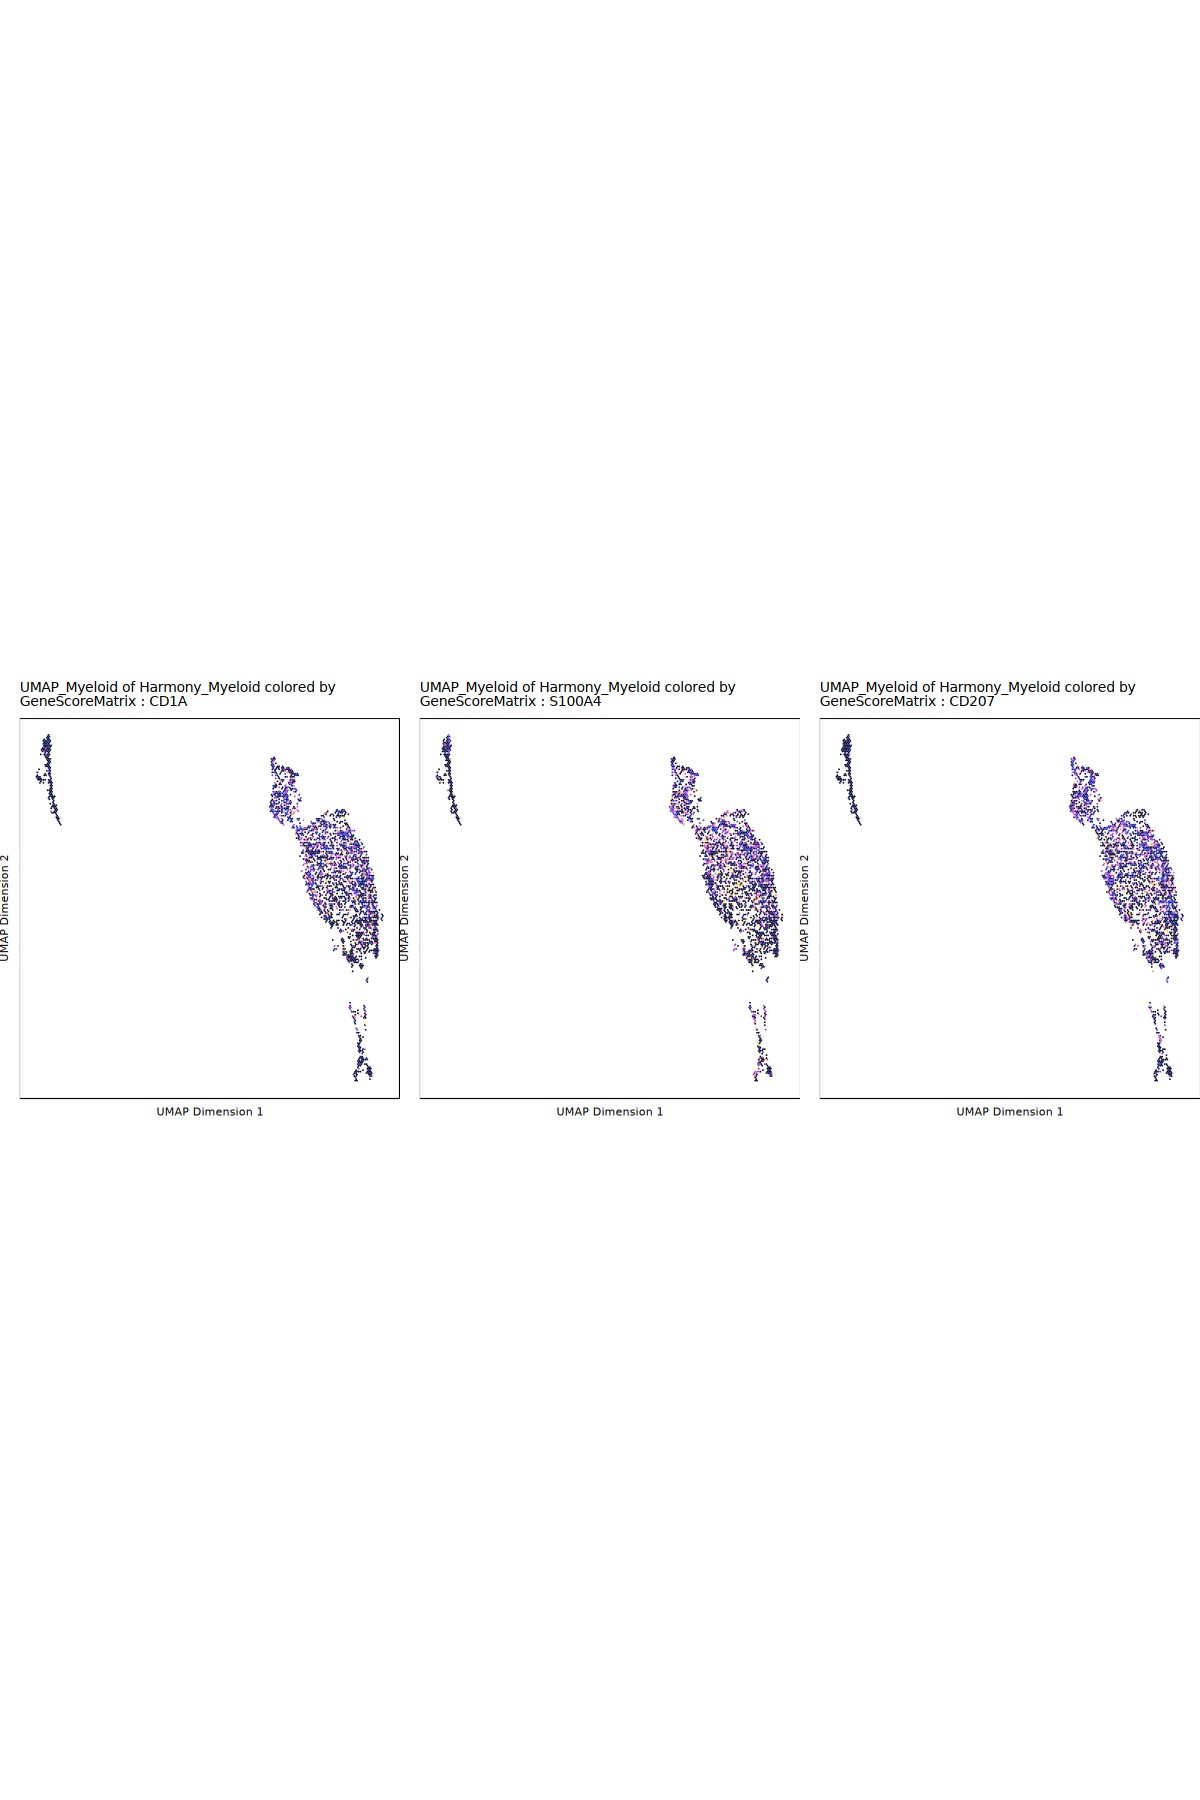

In [26]:
# langhans细胞
markerGenes <- c(
    "CD1A", "S100A4", "CD207"
)

# 基因得分UMAP可视化
p <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP_Myeloid",
    quantCut = c(0.01, 0.95),
    imputeWeights = NULL
)
options(repr.plot.height = 15, repr.plot.width = 10)
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-bb68e4119ec67-Date-2025-03-21_Time-11-49-36.579513.log
If there is an issue, please report to github with logFile!



Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2025-03-21 11:49:36.821392 : 



R_zmq_msg_send errno: 4 strerror: Interrupted system call




Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 
2 
3 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-bb68e4119ec67-Date-2025-03-21_Time-11-49-36.579513.log



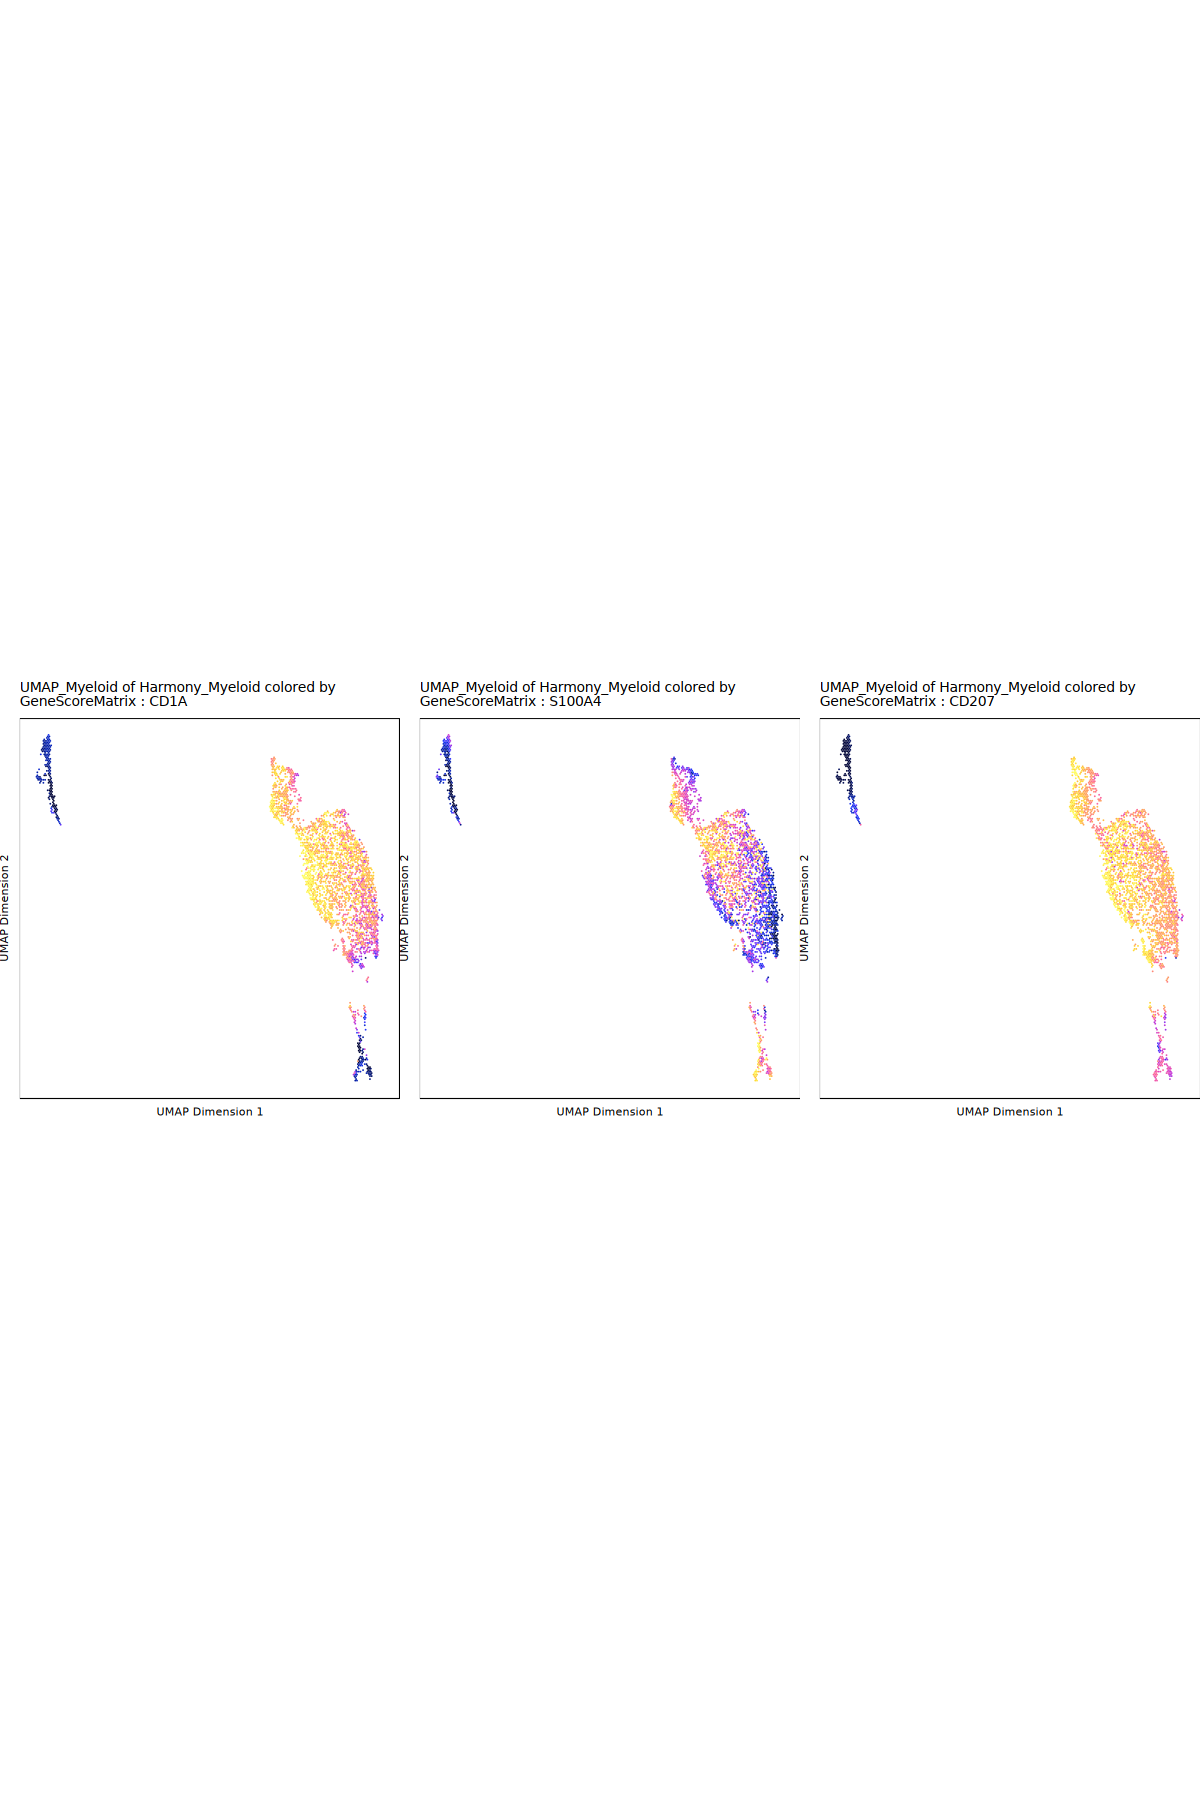

In [27]:
# 基因得分UMAP可视化
p <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP_Myeloid",
    quantCut = c(0.01, 0.95),
    imputeWeights = getImputeWeights(proj)
)
options(repr.plot.height = 15, repr.plot.width = 10)
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-bb68e57fbc829-Date-2025-03-21_Time-11-49-43.331912.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding



ColorBy = GeneScoreMatrix

Getting Matrix Values...

2025-03-21 11:49:43.564498 : 



Plotting Embedding

1 
2 
3 
4 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-bb68e57fbc829-Date-2025-03-21_Time-11-49-43.331912.log



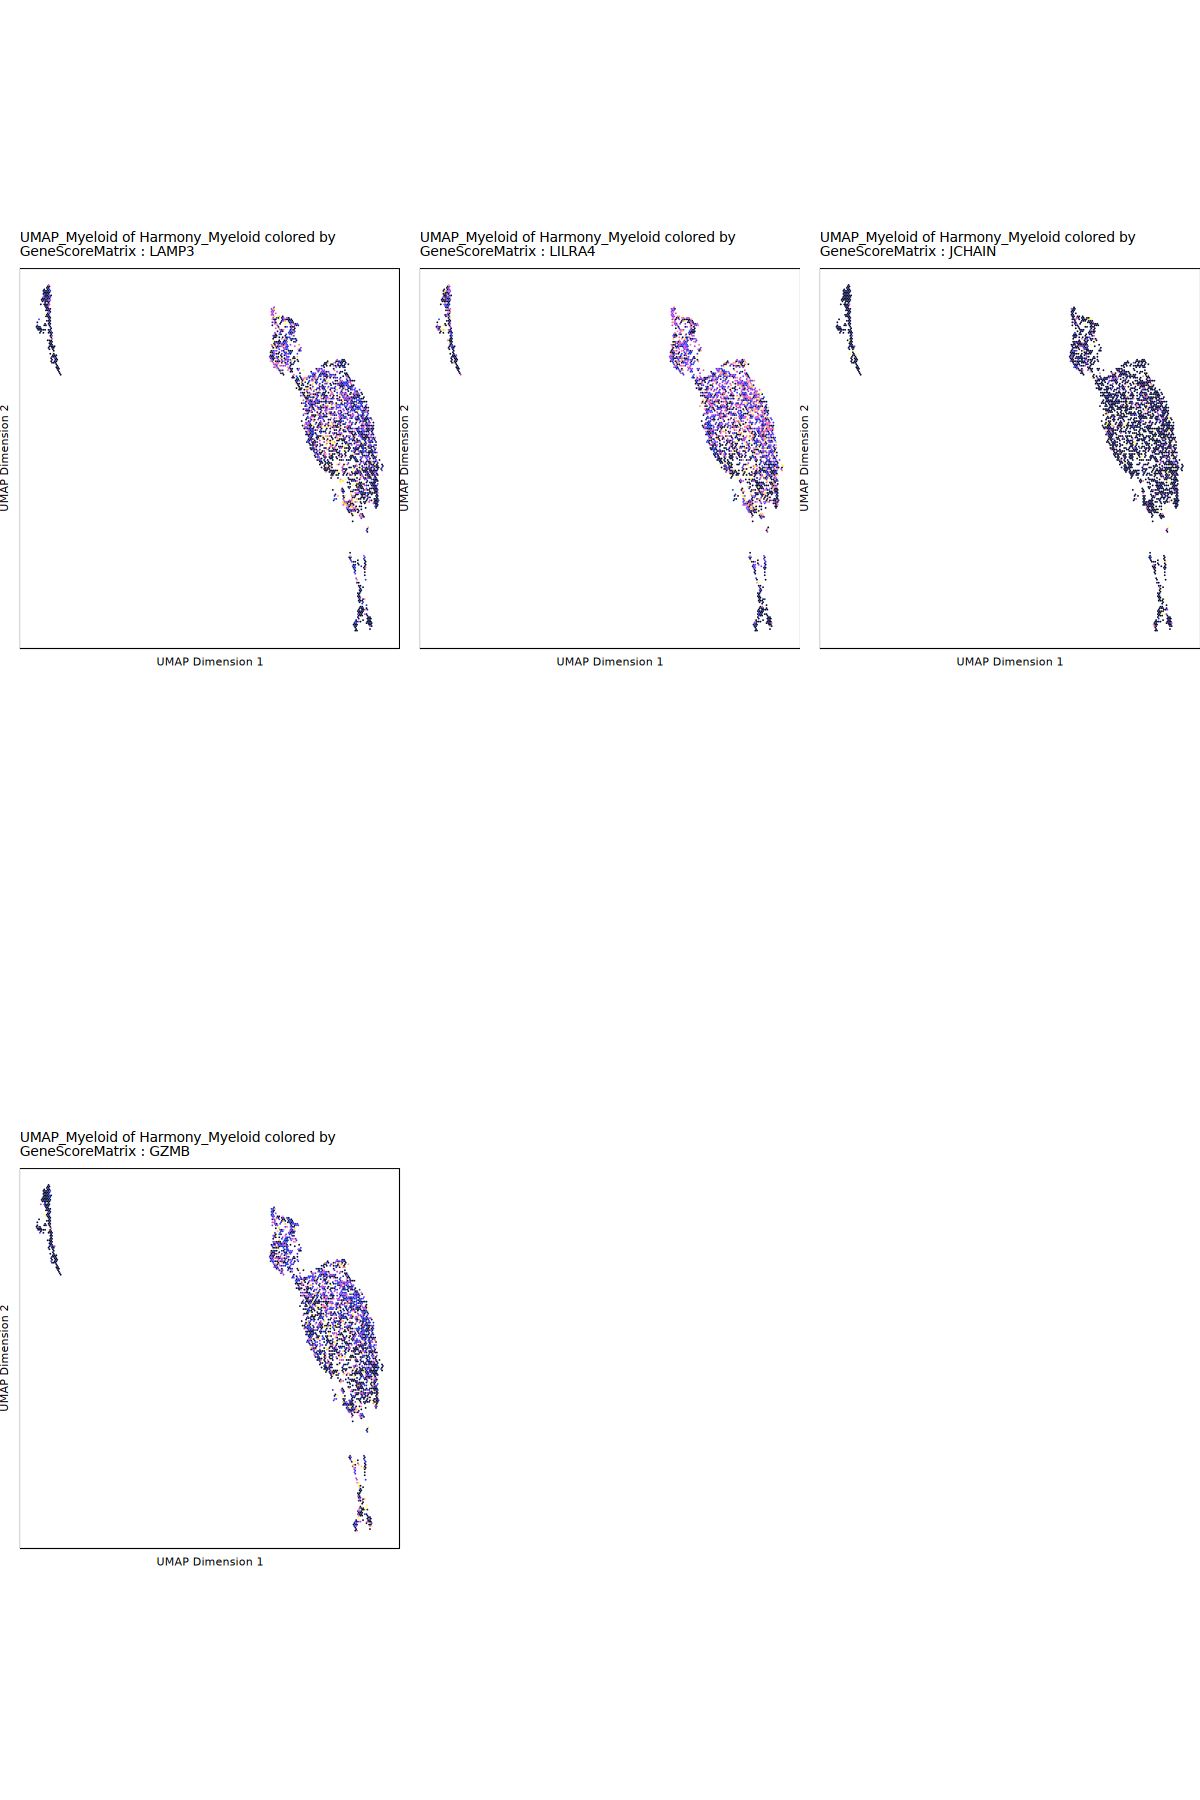

In [28]:
# 树突状细胞mDC&pDC
markerGenes <- c(
  "LAMP3", "LILRA4", "JCHAIN", "GZMB"
)

# 基因得分UMAP可视化
p <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP_Myeloid",
    quantCut = c(0.01, 0.95),
    imputeWeights = NULL
)
options(repr.plot.height = 15, repr.plot.width = 10)
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-bb68e634b850f-Date-2025-03-21_Time-11-49-50.106377.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2025-03-21 11:49:50.332581 : 



Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 
2 
3 
4 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-bb68e634b850f-Date-2025-03-21_Time-11-49-50.106377.log



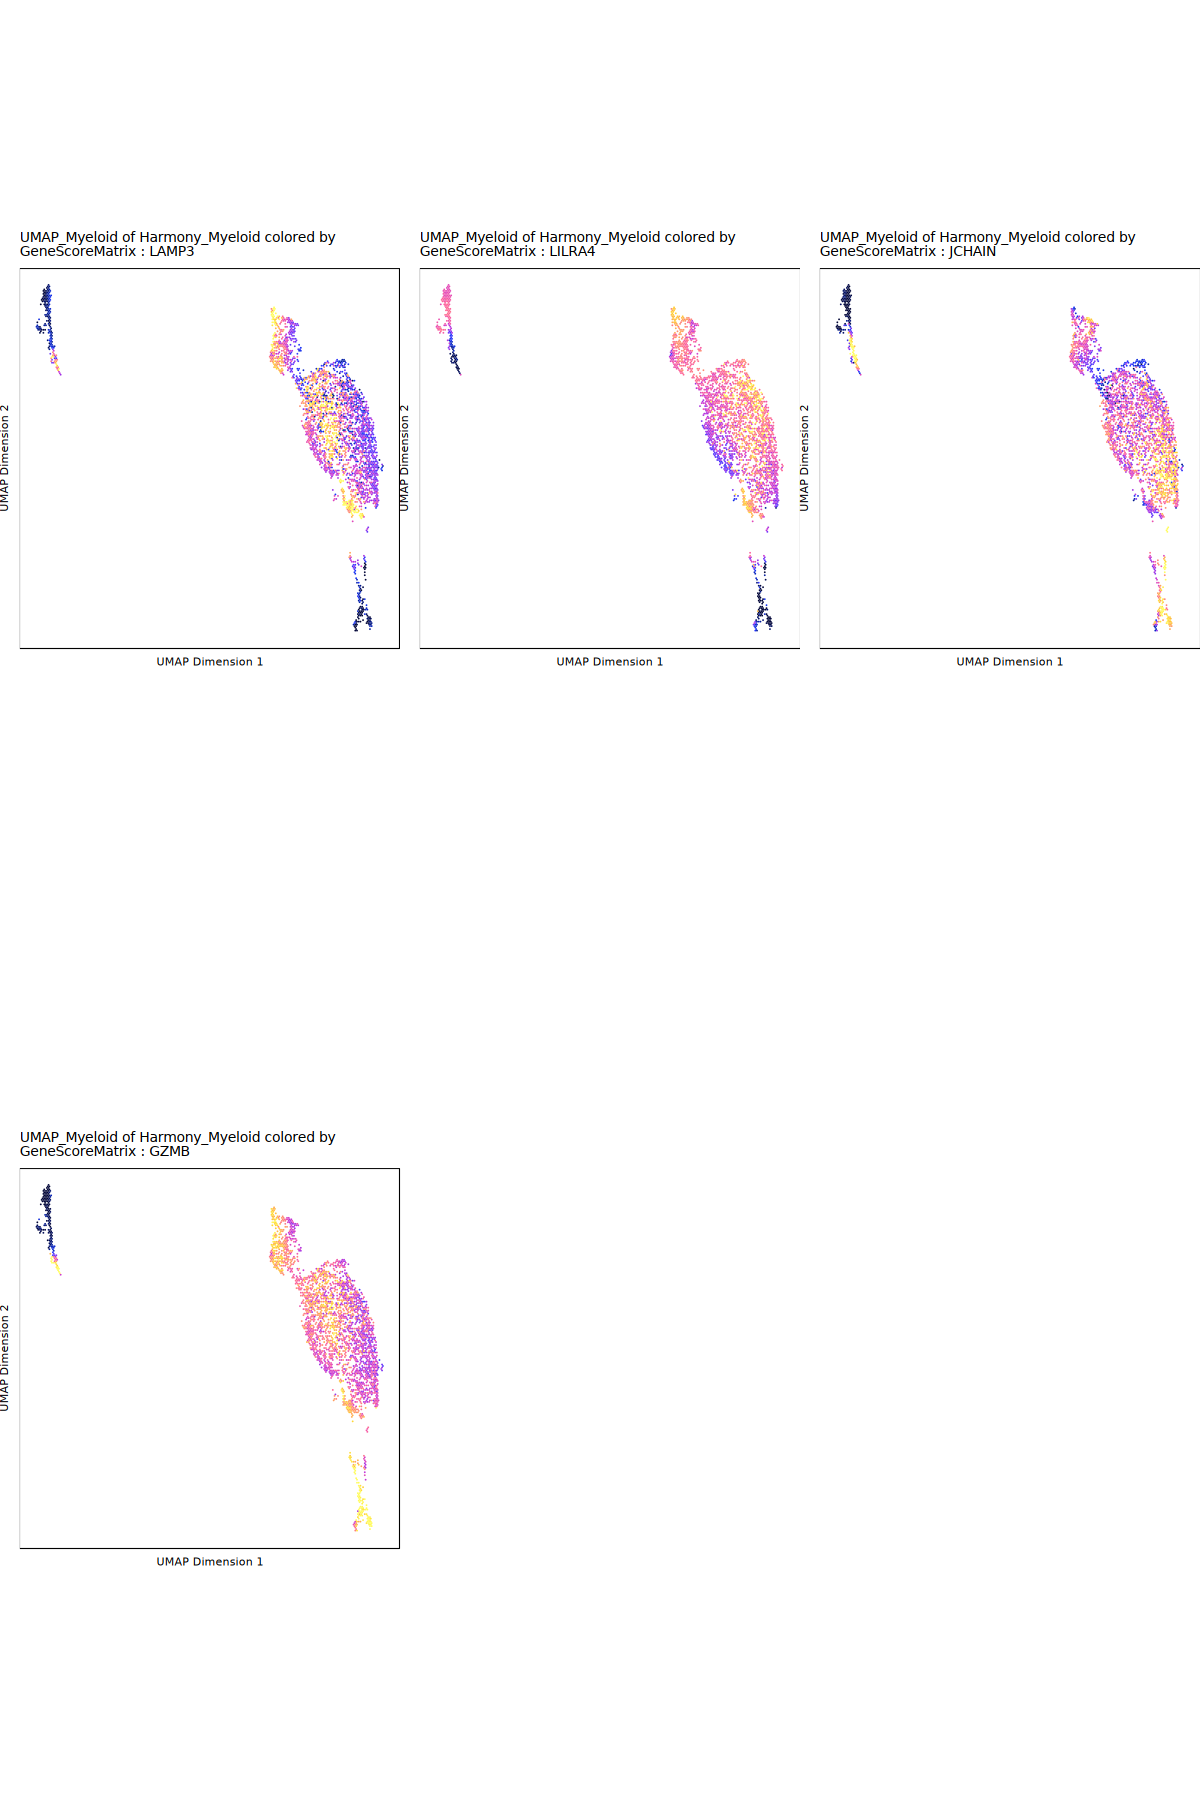

In [29]:
# 基因得分UMAP可视化
p <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP_Myeloid",
    quantCut = c(0.01, 0.95),
    imputeWeights = getImputeWeights(proj)
)
options(repr.plot.height = 15, repr.plot.width = 10)
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-bb68e13c5d70-Date-2025-03-21_Time-11-49-57.861635.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding



ColorBy = GeneScoreMatrix

Getting Matrix Values...

2025-03-21 11:49:58.120688 : 



Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-bb68e13c5d70-Date-2025-03-21_Time-11-49-57.861635.log



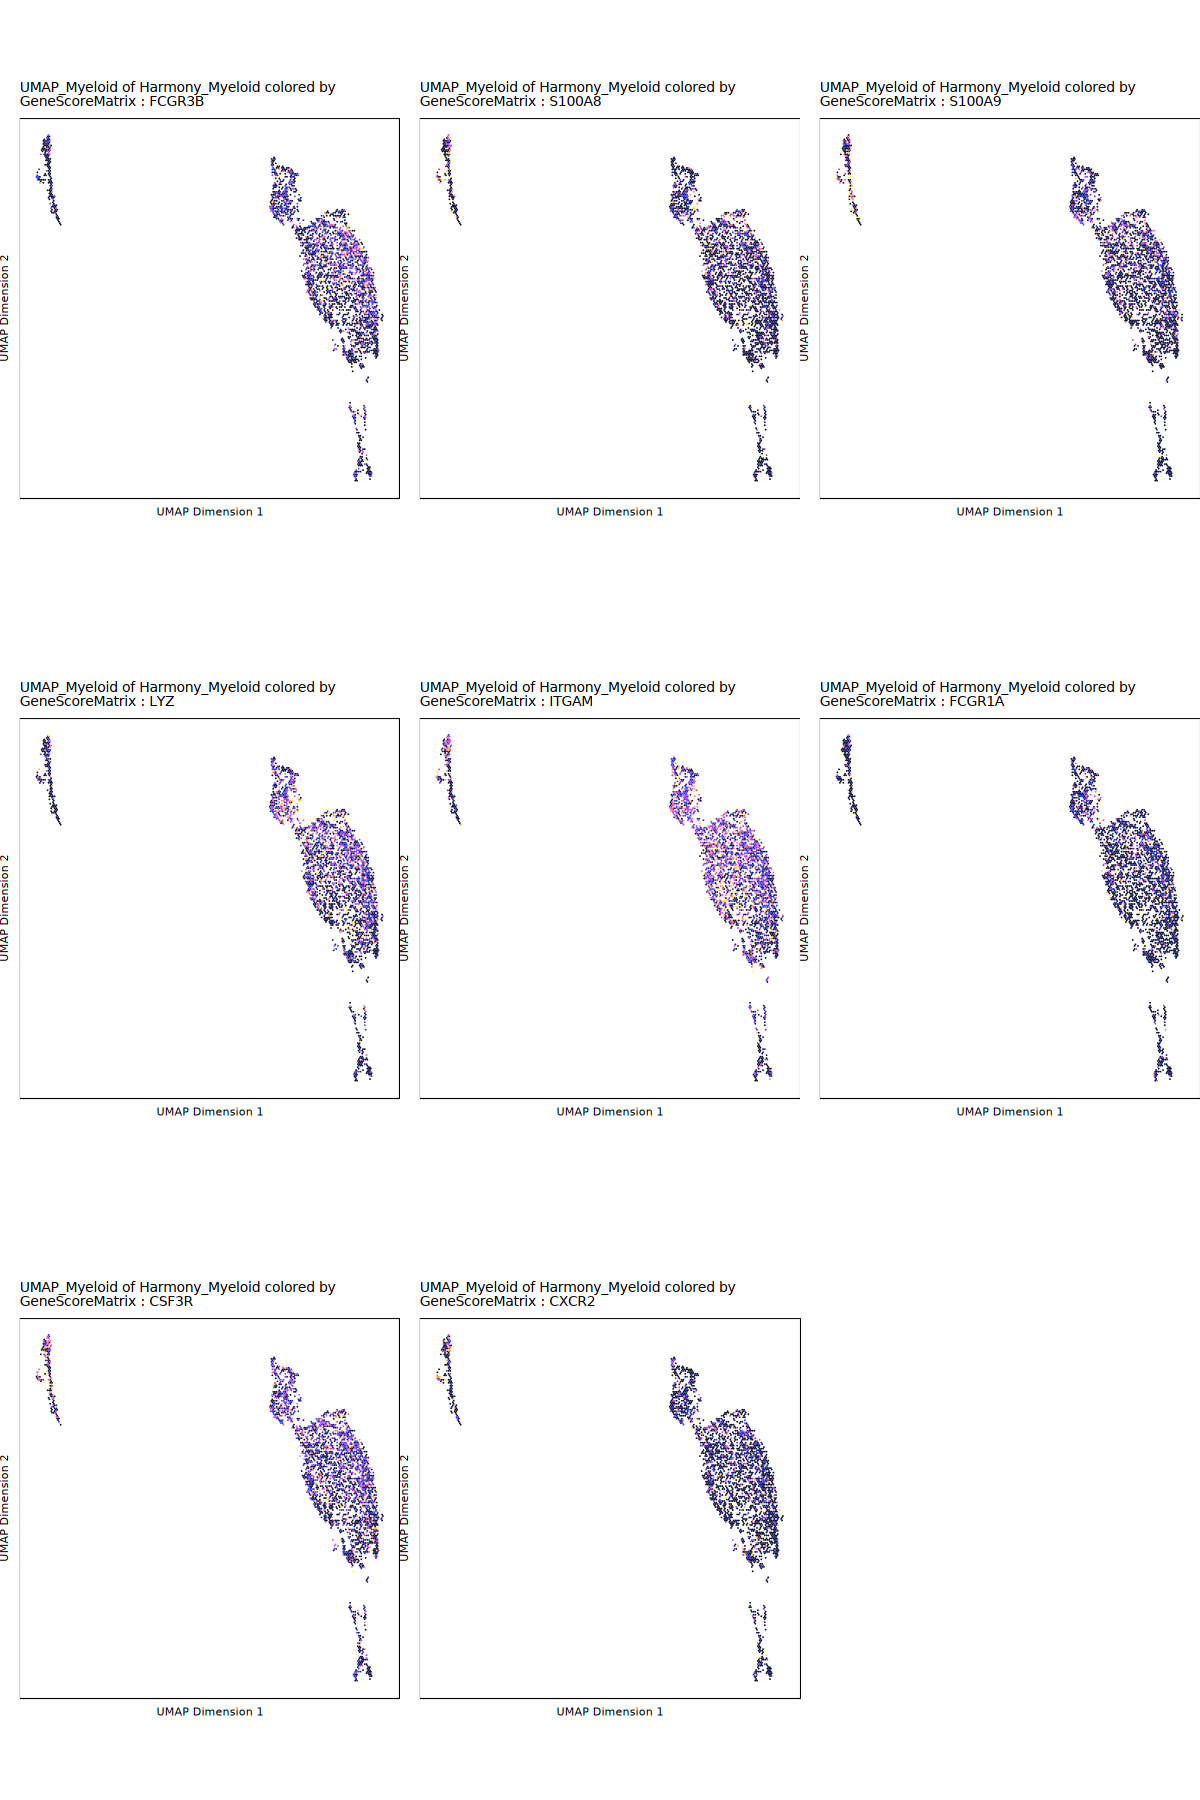

In [30]:
# 中性粒细胞
markerGenes <- c(
  "FCGR3B", "S100A8", "S100A9", "LYZ", "ITGAM", "FCGR1A", "CSF3R", "CXCR2"
)

# 基因得分UMAP可视化
p <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP_Myeloid",
    quantCut = c(0.01, 0.95),
    imputeWeights = NULL
)
options(repr.plot.height = 15, repr.plot.width = 10)
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-bb68e61b9d4f5-Date-2025-03-21_Time-11-50-06.936076.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2025-03-21 11:50:07.168853 : 



Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-bb68e61b9d4f5-Date-2025-03-21_Time-11-50-06.936076.log



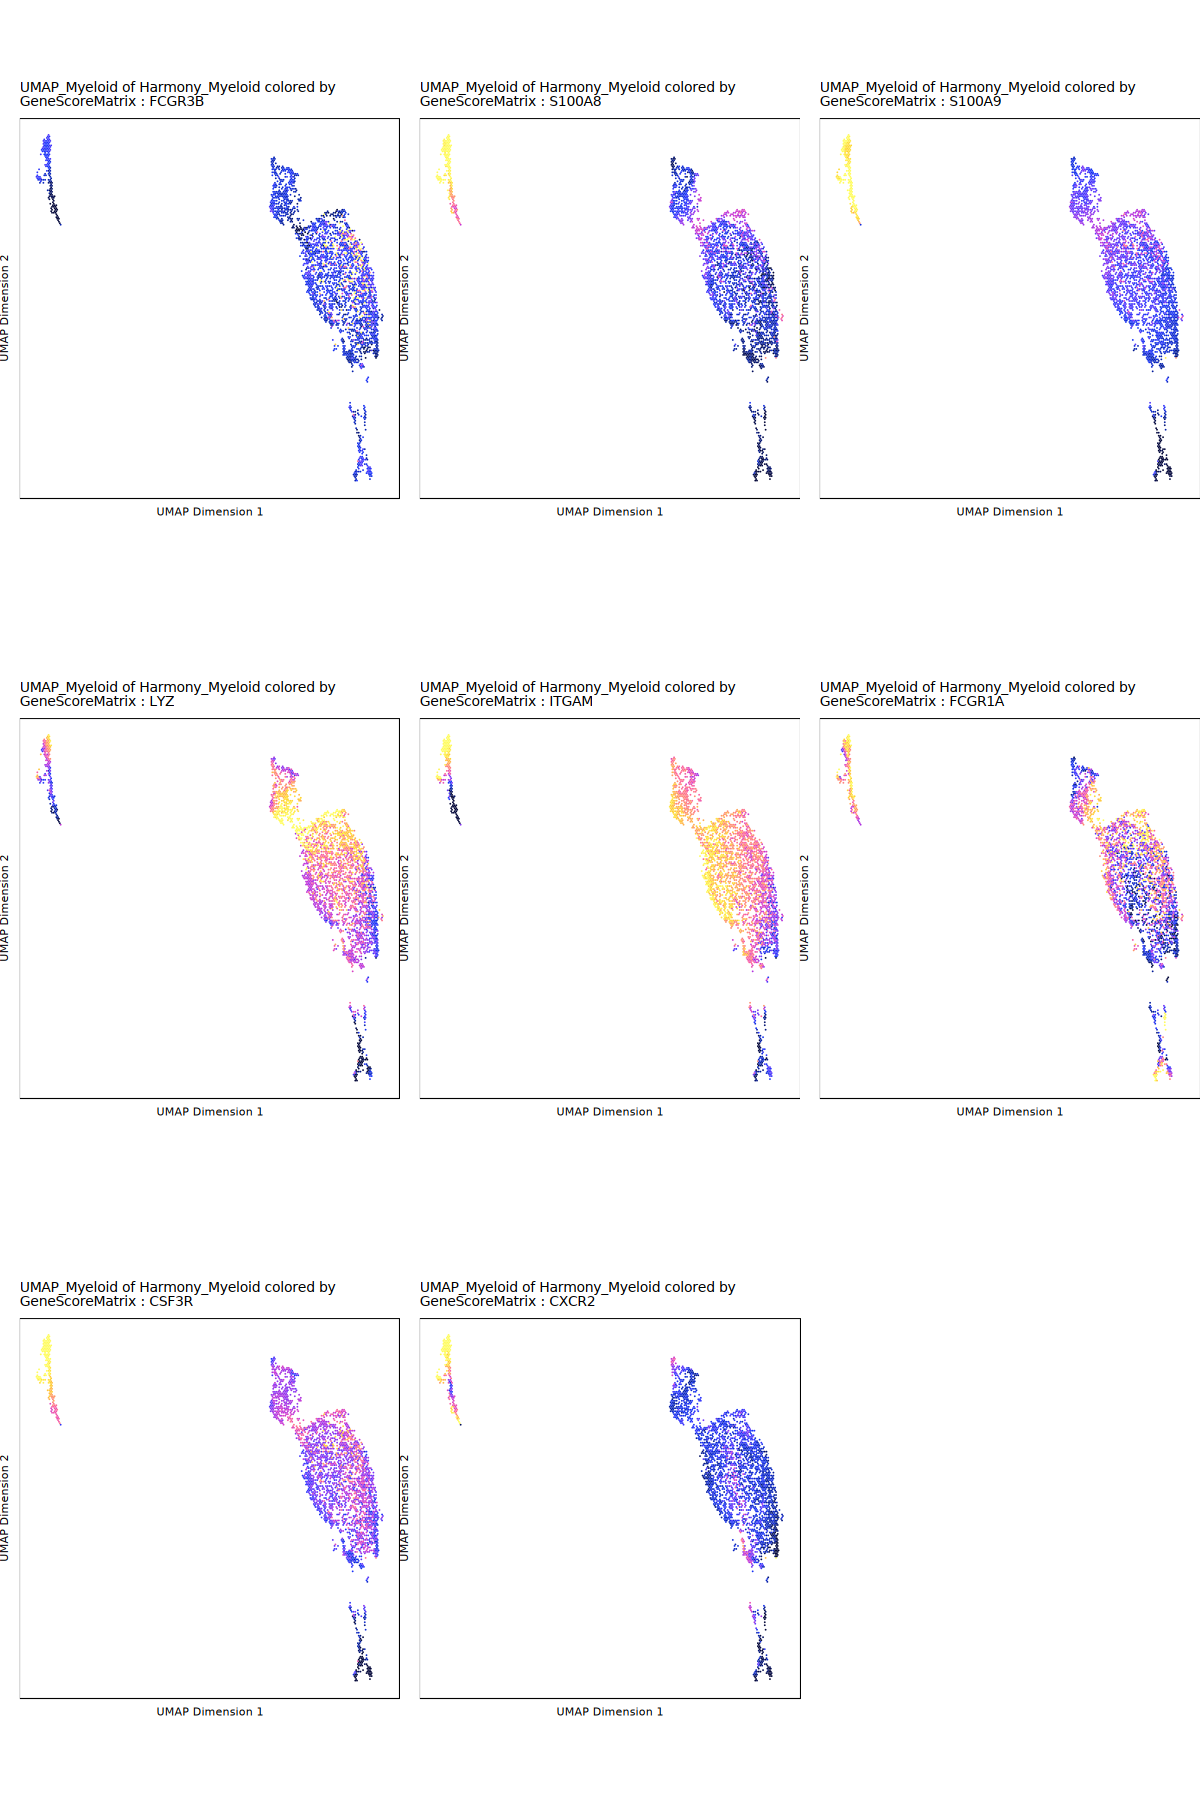

In [31]:
# 基因得分UMAP可视化
p <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP_Myeloid",
    quantCut = c(0.01, 0.95),
    imputeWeights = getImputeWeights(proj)
)
options(repr.plot.height = 15, repr.plot.width = 10)
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

In [60]:
## marker gene analysis
markersGS <- getMarkerFeatures(
    ArchRProj = proj,
    useMatrix = "GeneScoreMatrix",
    groupBy = "clusters_Myeloid",
    bias = c("TSSEnrichment", "log10(nFrags)"),
    testMethod = "wilcoxon"
    )

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-bb68e70fdc60e-Date-2025-03-22_Time-07-09-55.373085.log
If there is an issue, please report to github with logFile!



MatrixClass = Sparse.Double.Matrix

2025-03-22 07:09:55.786472 : Matching Known Biases, 0.005 mins elapsed.

###########
2025-03-22 07:12:23.219576 : Completed Pairwise Tests, 2.463 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-bb68e70fdc60e-Date-2025-03-22_Time-07-09-55.373085.log



In [61]:
saveRDS(markersGS, file = "./ArchRProject_Myeloid/markersGS_MyeloidCluster.rds")

In [62]:
markerList <- getMarkers(markersGS, cutOff = "FDR <= 0.05 & Log2FC >= 1.25")
markerList <- lapply(markerList, as.data.frame)
library(writexl)
## 按照MeanDiff排序
for(i in 1:length(markerList)){
    markerList[[i]] <- markerList[[i]][order(-markerList[[i]]$MeanDiff), ]
}
## 保存为Excel文件
WriteXLS::WriteXLS(markerList,
                   ExcelFileName = "./ArchRProject_Myeloid/markersGS_MyeloidCluster.xlsx",
                   SheetNames = names(markerList))

In [63]:
markerList <- getMarkers(markersGS, cutOff = "FDR <= 0.05 & Log2FC >= 1.25")
## Clusters差异基因，按照FDR排序，并保存为Excel文件
markerList <- lapply(markerList, as.data.frame)
for(i in 1:length(markerList)){
    markerList[[i]] <- markerList[[i]][order(markerList[[i]]$FDR), ]
}
WriteXLS::WriteXLS(markerList,
                   ExcelFileName = "./ArchRProject_Myeloid/markersGS_FDR_MyeloidCluster.xlsx",
                   SheetNames = names(markerList))

In [64]:
## majorType 差异peaks
markerPK <- getMarkerFeatures(
    ArchRProj = proj,
    useMatrix = "PeakMatrix", 
    groupBy = "clusters_Myeloid",
    bias = c("TSSEnrichment", "log10(nFrags)"),
    testMethod = "wilcoxon"
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-bb68e4687b774-Date-2025-03-22_Time-07-12-38.873463.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Integer.Matrix

2025-03-22 07:12:39.431397 : Matching Known Biases, 0.008 mins elapsed.

###########
2025-03-22 07:14:32.528152 : Completed Pairwise Tests, 1.893 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-bb68e4687b774-Date-2025-03-22_Time-07-12-38.873463.log



In [65]:
saveRDS(markerPK, file = "./ArchRProject_Myeloid/markersPK_MyeloidCluster.rds")

ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-bb68e647dd3f8-Date-2025-03-21_Time-11-54-59.835649.log
If there is an issue, please report to github with logFile!



Printing Top Marker Genes:

C1:

	HSPG2, TMEM234, TXNDC12-AS1, C1orf43, PYGO2, HSD17B7, ANKRD45, ZBTB37, GAS5, LINC01037, MRPL55, LINC01139, LOC101928226, GPR158, ZEB1-AS1

C2:

	NADK, MIR6729, PADI4, LOC100506801, SMPDL3B, XKR8, A3GALT2, KNCN, SLC44A5, LINC01361, C1orf194, MIR197, NPR1, MIR190B, SELP

C3:

	LDLRAD2, MIR3659, BEND5, LAD1, OPALIN, HMX2, CYP2E1, OR51D1, HRASLS2, MIR548L, C11orf88, LOC101928847, CLEC4C, TAS2R43, SLC26A10

C4:

	BARHL2, SLC16A9, MIR4682, PRR4, ASCL1, LINC00543, NAGPA, NAGPA-AS1, FAM171A2, BPIFA3, DGCR5, LOC440982, NAT8L, NKD2, LOC101928307

C5:

	PCF11-AS1, DNAJA4, LINC01858, AURKC, MIR3682, BPIFB6, OR1L6, SAMD11, MMP23A, NADK, TNFRSF25, LINC01714, MIR6729, PRAMEF20, PADI4

C6:

	LINC01714, MIR6127, C1QC, FCGR2C, FCGR3B, MIR1255B2, ZNF124, IFIT1, HTRA1, MIR4688, LINC02470, LRP1-AS, LPAR6, DIAPH3-AS1, OR11H6

C7:

	OR5T1, MIR3164, C15orf54, MFAP4, PCAT18, SERPINB13, GZMM, VSTM1, SNORA70F, CCL20, KLHL40, EREG, CXCL10, KPNA7, KBTBD11

C8:

	RHBDL2, LINC01389,

 [1] "CD86"    "CXCL9"   "CXCL10"  "CD68"    "C1QA"    "C1QB"    "C1QC"   
 [8] "IL12B"   "CD163"   "C3"      "CD14"    "FCGR3A"  "S100A8"  "S100A9" 
[15] "LYZ"     "CLEC9A"  "XCR1"    "BATF3"   "CD1C"    "CLEC10A" "CCR7"   
[22] "IRF4"    "CD1A"    "S100A4"  "CD207"   "LAMP3"   "LILRA4"  "JCHAIN" 
[29] "GZMB"    "FCGR3B"  "ITGAM"   "FCGR1A"  "CSF3R"   "CXCR2"  


Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotMarkerHeatmap-bb68e647dd3f8-Date-2025-03-21_Time-11-54-59.835649.log



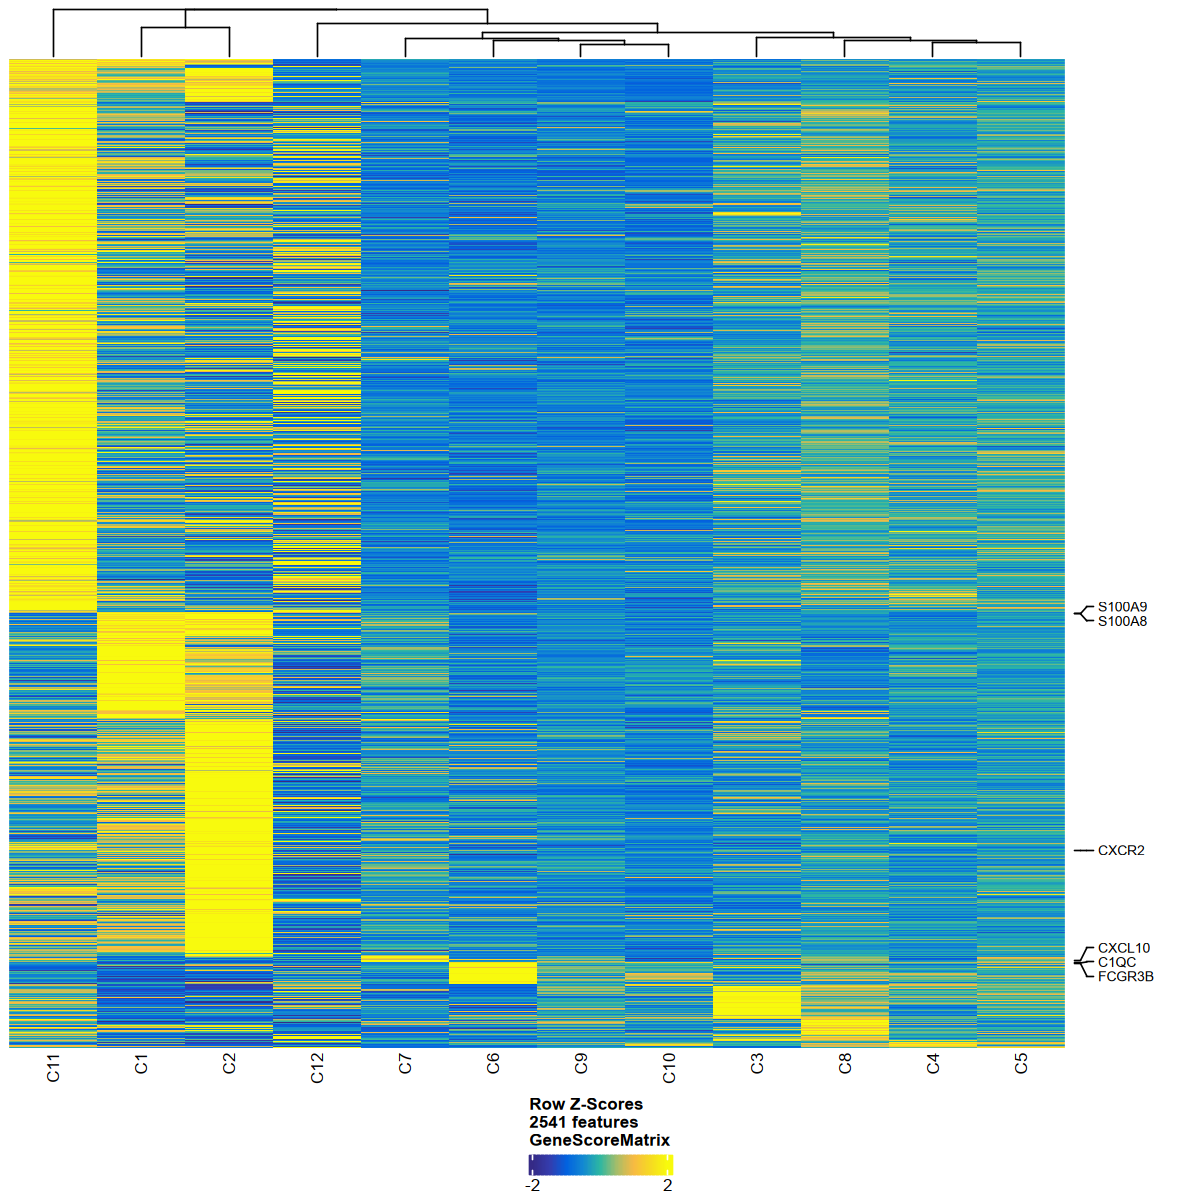

In [38]:
markerGenes <- c(
    "CD86", "CXCL9", "CXCL10", "CD68", "C1QA", "C1QB", "C1QC", "IL12B", # 巨噬细胞M1
    "CD163", "C3", # 巨噬细胞M2
    "CD14", "FCGR3A", "S100A8", "S100A9", "LYZ", # 单核细胞
    "CLEC9A", "XCR1", "BATF3", "CD1C", 
    "CLEC10A", "CCR7", "IRF4",
    "CD1A","S100A4", "CD207", 
    "LAMP3", "LILRA4", "JCHAIN", "GZMB",
    "FCGR3B", "ITGAM", "FCGR1A", "CSF3R", "CXCR2"
)


heatmapGS <- plotMarkerHeatmap(
  seMarker = markersGS, 
  cutOff = "FDR <= 0.05 & Log2FC >= 1.25", 
  labelMarkers = markerGenes
)

options(repr.plot.height = 10, repr.plot.width = 10)
ComplexHeatmap::draw(heatmapGS, 
                     heatmap_legend_side = "bot", 
                     annotation_legend_side = "bot")

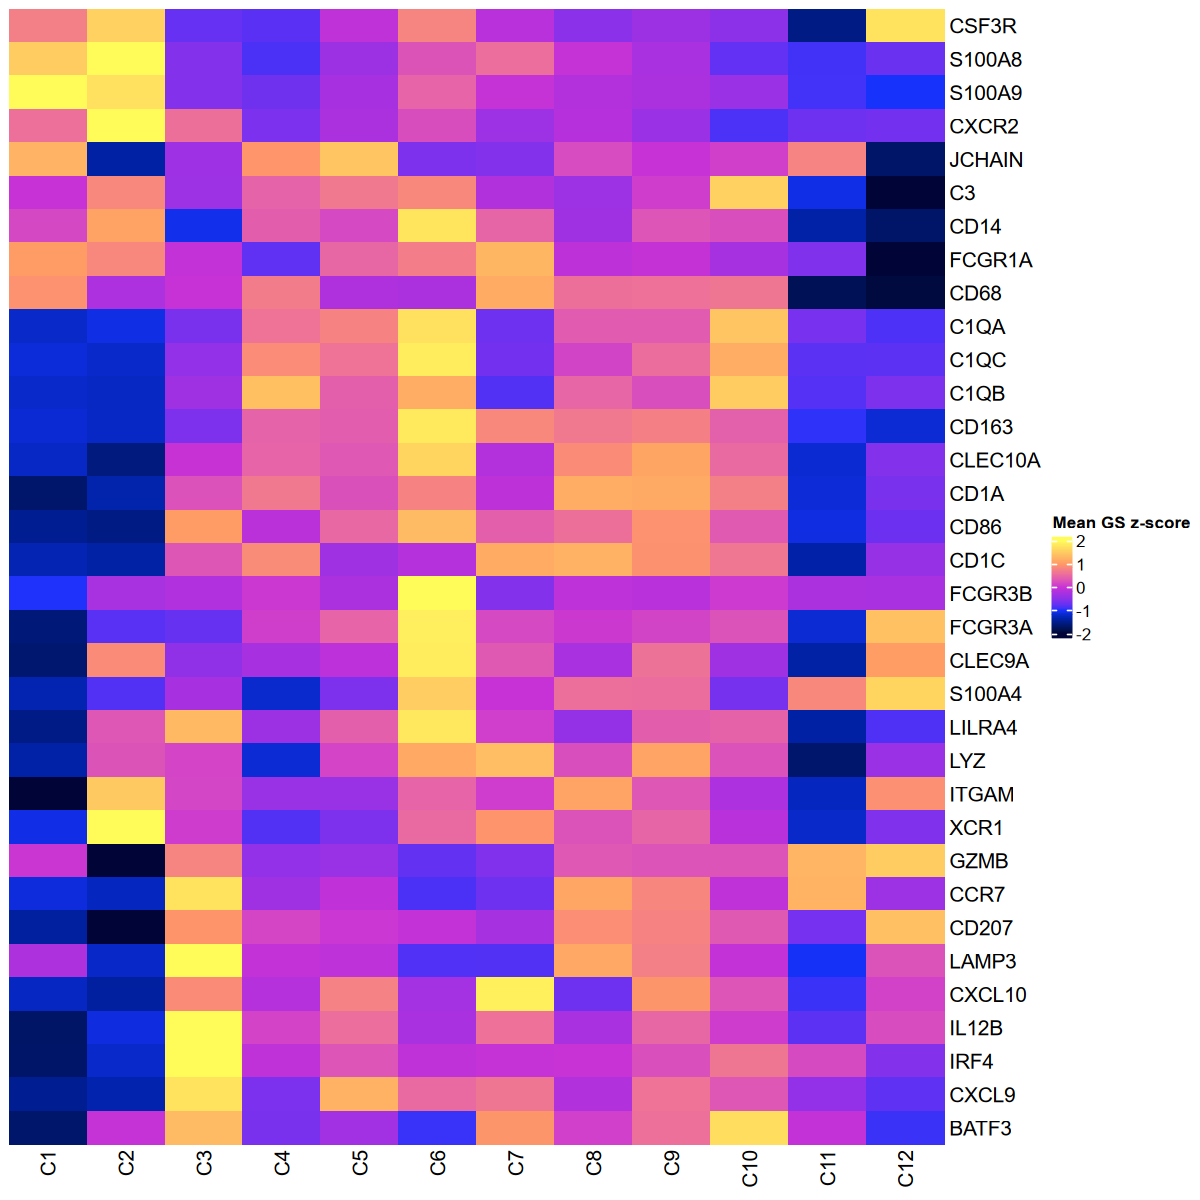

In [39]:
## 绘制只有marker基因的热图，Mean GS z-score

### 提取差异基因中在marker genes中的基因
idx <- which(mcols(markersGS)$name %in% markerGenes)
### 提取指定行，为矩阵
mtx <- assays(markersGS[idx,])$Mean %>% `rownames<-`(., mcols(markersGS)$name[idx])
### 标准化（z-score），并转置
mtx <- t(scale(t(mtx)))
### 定义层次聚类函数de
fh <- function(x) hclust(dist(x), method="ward.D2")
### 定义颜色函数
col_fun1 <- colorRamp2(c(-2,-1,0,1,2), paletteContinuous(set = "horizonExtra", n = 5))
options(repr.plot.width = 10, repr.plot.height = 10)
ht1 <- Heatmap(mtx, name = "Mean GS z-score", cluster_rows = fh, cluster_columns = F, show_row_dend = F, col = col_fun1)
p3 <- draw(ht1)
p3

In [40]:
mtx

C1          C2          C3           C4          C5         
C1QA    -1.23064932 -1.10992945 -0.635924994  0.58436516  0.76255181
C1QC    -1.15592473 -1.22289598 -0.474125404  0.85130657  0.58333283
C1QB    -1.22888375 -1.25856385 -0.361251414  1.38016505  0.38732703
CSF3R    0.72219895  1.55594147 -0.753949242 -0.81367667 -0.07769365
FCGR1A   1.02994365  0.80195046 -0.037083509 -0.77857806  0.46374837
S100A9   2.21284708  1.70851074 -0.571439567 -0.69614320 -0.29545687
S100A8   1.50795669  2.25201593 -0.581993793 -0.87434947 -0.38887661
S100A4  -1.34925971 -0.84965866 -0.303464191 -1.20847373 -0.61237947
CD1A    -1.70626445 -1.37482955  0.259521566  0.65190921  0.24598842
CD1C    -1.33043552 -1.40544020  0.301598844  0.84354593 -0.36806073
FCGR3A  -1.63921732 -0.82205387 -0.749684621  0.09250903  0.43150018
FCGR3B  -0.99035896 -0.29278867 -0.222046246  0.03764710 -0.26421115
BATF3   -1.70903264 -0.01765664  1.331778869 -0.64189749 -0.35153259
CD163   -1.18720409 -1.24537188 -0.619547822  0.42303783  0.36987181
CLEC9A  -1.68136691  0.84721293 -0.486479518 -0.29706305 -0.10938653
LYZ     -1.39419455  0.27409401  0.146924392 -1.17999328  0.14655838
GZMB     0.03075290 -2.21565630  0.776277943 -0.46884808 -0.41295197
ITGAM   -2.10293223  1.47537491  0.155319326 -0.41632452 -0.41564032
CLEC10A -1.25644615 -1.60379866 -0.003304417  0.43698847  0.31686354
CD68     0.92369884 -0.24730531 -0.014125430  0.68751958 -0.22691398
CCR7    -1.14245729 -1.27837242  1.742584528 -0.36358870 -0.07349002
C3      -0.01449309  0.81036704 -0.386566789  0.42360648  0.65265545
LILRA4  -1.56081885  0.30729480  1.313364006 -0.38916140  0.38518640
CD207   -1.43450503 -2.02524626  0.959811619  0.15037031  0.03247827
CXCR2    0.55587403  2.79449713  0.548988759 -0.62981607 -0.26133178
XCR1    -1.09821717  2.32043449  0.071510275 -0.84616905 -0.61074779
CD86    -1.50030418 -1.57744604  1.031028312 -0.11752319  0.47098376
LAMP3   -0.23905576 -1.23640319  2.246965249 -0.05041468 -0.09255878
JCHAIN   1.25139036 -1.41481491 -0.377358684  0.95729581  1.43660345
CXCL9   -1.50185211 -1.36851099  1.727667386 -0.62912712  1.23524317
CXCL10  -1.26569968 -1.43347940  0.855433479 -0.18664550  0.74721594
CD14     0.17262153  1.09755716 -1.069046397  0.37815652  0.17837857
IL12B   -1.72983410 -1.12846785  2.246912637  0.13382799  0.53148131
IRF4    -1.71635335 -1.22128505  2.377814934 -0.08379866  0.29353979
        C6          C7           C8          C9          C10        
C1QA     1.71274183 -0.709498033  0.35396531  0.35258625  1.43712213
C1QC     1.84588468 -0.680394302  0.14173763  0.52326359  1.19370449
C1QB     1.19295567 -0.848390049  0.45114507  0.22786145  1.50160338
CSF3R    0.77479226 -0.146900376 -0.52372991 -0.39284629 -0.50415488
FCGR1A   0.70496542  1.281804789 -0.10083972 -0.02756770 -0.31485452
S100A9   0.43437939 -0.016283342 -0.19688768 -0.26633545 -0.40691074
S100A8   0.27444215  0.534035907 -0.02434333 -0.28623081 -0.77612971
S100A4   1.51222175 -0.006568142  0.54288424  0.52791022 -0.66842061
CD1A     0.76151075 -0.096831440  1.18528267  1.16411453  0.72117160
CD1C    -0.17440774  1.170543715  1.24382494  0.91486768  0.63521385
FCGR3A   1.84926343  0.181097855  0.04505439  0.13907474  0.26284081
FCGR3B   3.04807412 -0.580232149 -0.09193238 -0.15032179  0.05598578
BATF3   -0.93495482  0.952028570  0.10393100  0.55911715  1.67371337
CD163    1.80303775  0.817776756  0.65306518  0.72799139  0.39454063
CLEC9A   1.84874183  0.325980008 -0.28292757  0.57537662 -0.36891993
LYZ      1.15207138  1.359852412  0.22954636  1.10566349  0.26024637
GZMB    -0.77347474 -0.594900984  0.32108290  0.28097917  0.27921111
ITGAM    0.43642711  0.080087580  1.10979553  0.31239762 -0.24783239
CLEC10A  1.59878177 -0.190713953  0.85673836  1.11656697  0.48978879
CD68    -0.26529673  1.176116958  0.54993621  0.56886133  0.61482364
CCR7    -0.87474025 -0.708980094  1.12723223  0.78778410 -0.08274937
C3       0.81532693 -0.209365280 -0.38540020  0.08303626  1.56018562
LILRA4

In [66]:
cell_annotations <- list(
    "Monocytes" = paste0("C", c(1, 2)), # 单核
    "Macrophages" = paste0("C", c(4:10)), #巨噬
    "pDC" = paste0("C", c(11)),
    "mDC" = paste0("C", c(3)),
    "Langhans" = paste0("C", c(12))
)

In [67]:
## 根据cell——annotations和proj$Clusters创建proj$cellType列
# 对于cell_annotations中的每一个元素（细胞类型）返回proj$Clusters中对应的索引
idz <- lapply(cell_annotations, function(x) which(proj$clusters_Myeloid %in% x))
# 创建proj$cellType列，长度为proj@cellColData的行数，初始化为NA
proj$MyeloidType <- rep(NA, nrow(proj@cellColData))
# 遍历idz中的每一个元素，将proj$cellType中对应的索引赋值为元素的名称
for(i in names(idz)){proj$MyeloidType[idz[[i]]] <- i}

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-ef00a50a5bfd-Date-2025-03-25_Time-10-25-48.322336.log
If there is an issue, please report to github with logFile!



Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-ef00a50a5bfd-Date-2025-03-25_Time-10-25-48.322336.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-ef00a4b33eab5-Date-2025-03-25_Time-10-25-48.652224.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-ef00a4b33eab5-Date-2025-03-25_Time-10-25-48.652224.log



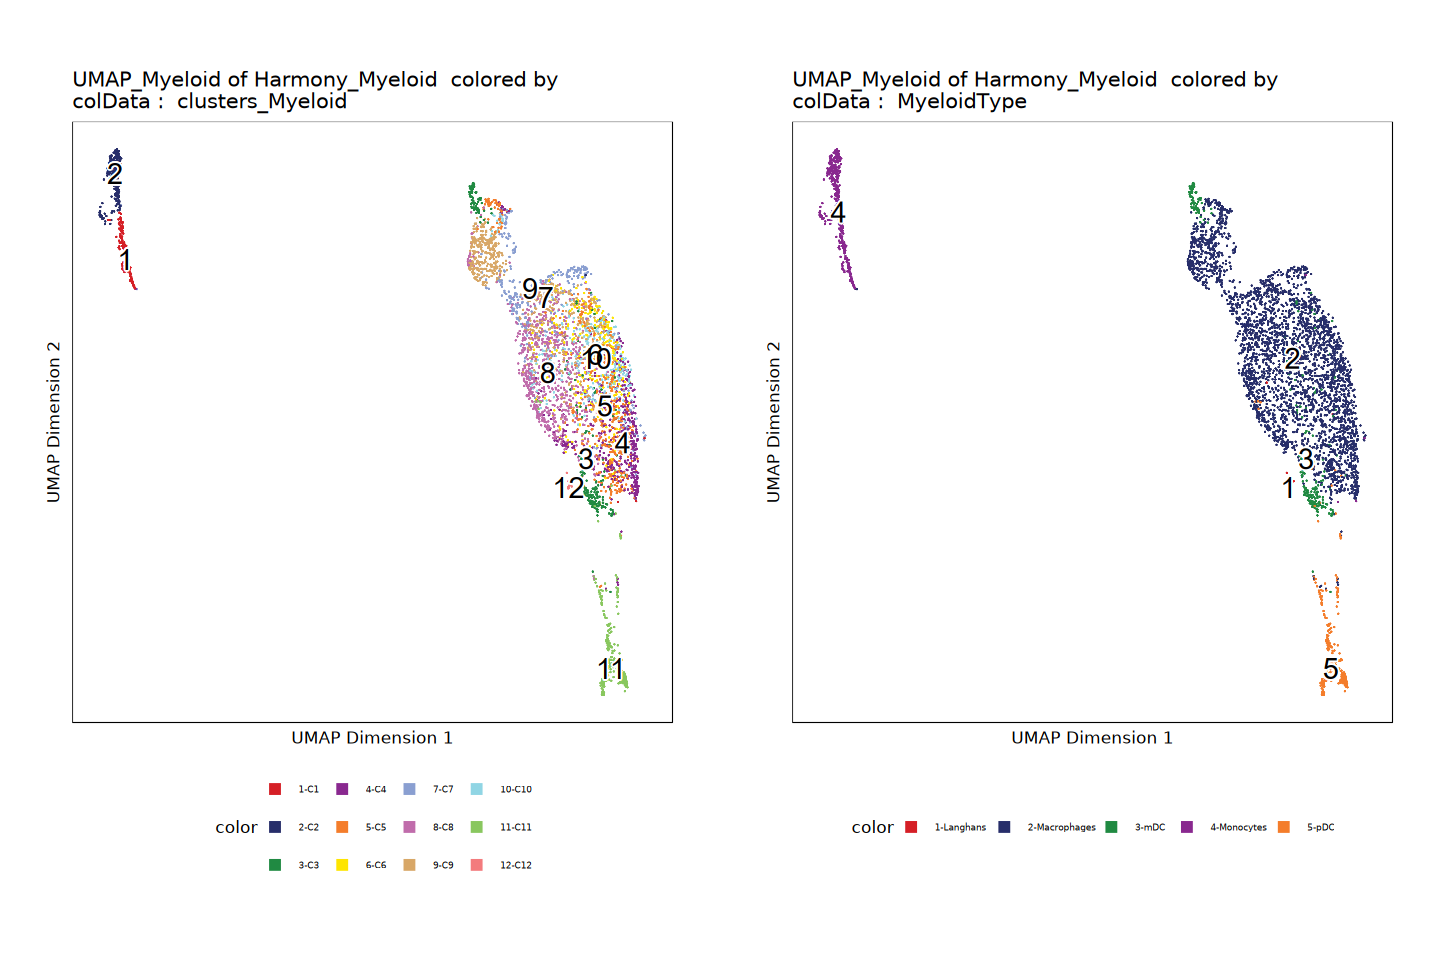

In [5]:
options(repr.plot.height = 8, repr.plot.width = 12)
p1 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "clusters_Myeloid", 
    embedding = "UMAP_Myeloid",
    labelSize = 6
    )
p2 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "MyeloidType", 
    embedding = "UMAP_Myeloid",
    labelSize = 6
    )
ggAlignPlots(p1, p2, type = "h")

In [6]:
new_order <- c(
     "Monocytes", "Macrophages" , "pDC" , "mDC" ,"Langhans"
)

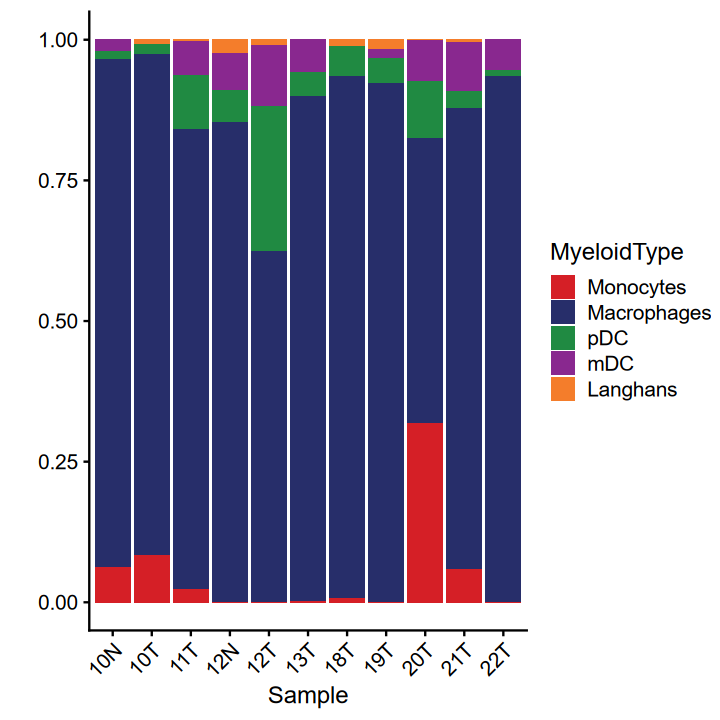

In [7]:
# 计算各样本中细胞类型的比例
sample_cell_type_distribution <- table(proj$Sample, proj$MyeloidType)
sample_cell_type_distribution <- prop.table(sample_cell_type_distribution, 1)

# 转换为数据框
df_sample <- as.data.frame(sample_cell_type_distribution)
df_sample$Var2 <- factor(df_sample$Var2, levels = new_order)
cols <- ArchR::paletteDiscrete(df_sample$Var2)

# 创建堆叠图
p <- ggplot(df_sample, aes(x = Var1, y = Freq, fill = Var2)) +
  geom_bar(stat="identity", position = position_stack(reverse = TRUE)) +
  scale_fill_manual(values = cols) +
  theme_cowplot() +
  xlab("Sample") +
  ylab("") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(fill = "MyeloidType")

options(repr.plot.width = 6, repr.plot.height = 6)
# ggsave("/data/hanxue/BCY_ATAC/joint_output/Sample-CellType-Distribution.svg",plot = p, width = 6, height = 6, device = "svg")
p

In [5]:
proj$neoadjuvant <- ifelse(
  proj$neoadjuvant == "after_neoadjuvant", 
  "Post-NAT", 
  "Non-NAT"
)

In [ ]:
markerGenes  <- c(
    "SPP1",
    "CXCL9"
  )
p <- plotBrowserTrack(
    ArchRProj = proj, 
    groupBy = "neoadjuvant", 
    geneSymbol = markerGenes, 
    upstream = 50000,
    downstream = 50000
)

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-226ee07c285e2-Date-2025-09-07_Time-16-13-01.504508.log
If there is an issue, please report to github with logFile!

2025-09-07 16:13:01.584798 : Validating Region, 0.001 mins elapsed.



GRanges object with 2 ranges and 2 metadata columns:
      seqnames            ranges strand |     gene_id      symbol
         <Rle>         <IRanges>  <Rle> | <character> <character>
  [1]     chr4 87975650-87983426      + |        6696        SPP1
  [2]     chr4 76001275-76007488      - |        4283       CXCL9
  -------
  seqinfo: 24 sequences from hg38 genome


2025-09-07 16:13:01.652526 : Adding Bulk Tracks (1 of 2), 0.002 mins elapsed.

2025-09-07 16:13:05.448204 : Adding Feature Tracks (1 of 2), 0.066 mins elapsed.

2025-09-07 16:13:05.523437 : Adding Gene Tracks (1 of 2), 0.067 mins elapsed.

2025-09-07 16:13:07.123907 : Plotting, 0.094 mins elapsed.

2025-09-07 16:13:07.480946 : Adding Bulk Tracks (2 of 2), 0.1 mins elapsed.

2025-09-07 16:13:10.275238 : Adding Feature Tracks (2 of 2), 0.146 mins elapsed.

2025-09-07 16:13:10.350204 : Adding Gene Tracks (2 of 2), 0.147 mins elapsed.

2025-09-07 16:13:10.665796 : Plotting, 0.153 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotBrowserTrack-226ee07c285e2-Date-2025-09-07_Time-16-13-01.504508.log



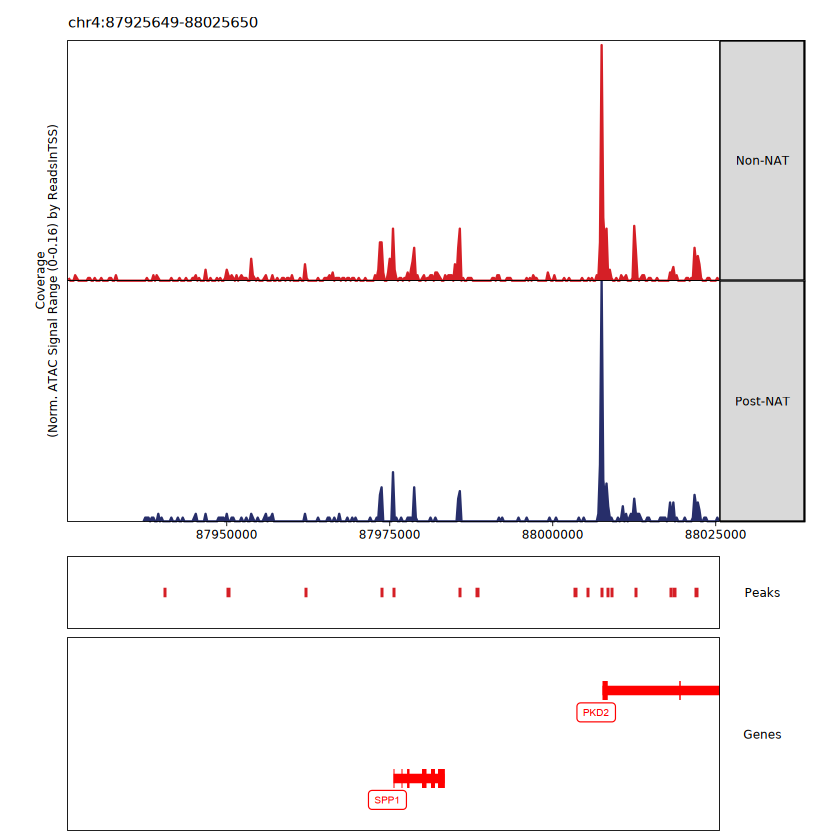

In [9]:
grid::grid.newpage()
grid::grid.draw(p$SPP1)

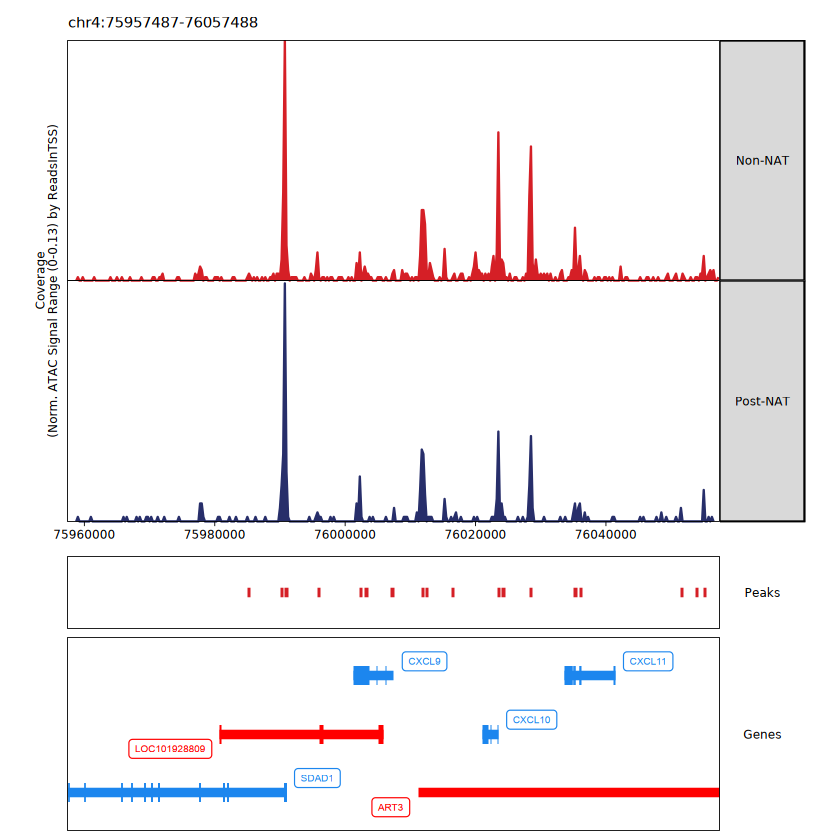

In [11]:
grid::grid.newpage()
grid::grid.draw(p$CXCL9)

In [ ]:
plotPDF(plotList = p, 
    name = "Mye-Tracks-Marker-Genes", 
    ArchRProj = proj, 
    addDOC = FALSE, width = 5, height = 5)

Plotting Gtable!



NULL


Plotting Gtable!



NULL


#### TF footprint

In [5]:
motifPositions <- getPositions(proj)
motifPositions

GRangesList object of length 332:
$AP.1.bZIP_1
GRanges object with 67738 ranges and 1 metadata column:
          seqnames              ranges strand |     score
             <Rle>           <IRanges>  <Rle> | <numeric>
      [1]     chr1       832379-832388      + |   9.05348
      [2]     chr1       967006-967015      - |   9.04335
      [3]     chr1     1006754-1006763      - |   9.55856
      [4]     chr1     1022065-1022074      + |   8.77324
      [5]     chr1     1022064-1022073      - |   9.14812
      ...      ...                 ...    ... .       ...
  [67734]     chrX 155334754-155334763      + |   9.64631
  [67735]     chrX 155334560-155334569      - |   9.04335
  [67736]     chrX 155334753-155334762      - |   9.55022
  [67737]     chrX 155888402-155888411      + |   9.77651
  [67738]     chrX 155888401-155888410      - |   9.40673
  -------
  seqinfo: 23 sequences from an unspecified genome; no seqlengths

...
<331 more elements>

In [9]:
# SPP1 CXCL9 FOLR2 MMP9对应的转录因子
# CXCL9：STAT1、IRF1/8、NFkB

# SPP1/MMP9：AP-1（JUN/FOS）、NFkB、CEBPB

# FOLR2：MAF、PPARG、KLF4
# tfs <- c("STAT1","IRF1","IRF8","NFKB1","RELA","JUN","FOS","CEBPB","SPI1","MAF","PPARG","KLF4")
tfs <- c('CEBPE','EPAS1','FOSL1','MAF','NFKB1','PAX8','REL','RELB','RFX3','TCF21','TEAD4','ZEB1','ZNF281')
markerMotifs <- unique(unlist(lapply(tfs, function(x)
  grep(x, names(motifPositions), value = TRUE, ignore.case = TRUE)
)))
markerMotifs

[1] "MafA.bZIP_156"            "MafF.bZIP_157"           
[3] "MafK.bZIP_158"            "Pax8.Paired.Homeobox_216"
[5] "NFkB.p65.Rel.RHD_180"     "Tcf21.bHLH_287"          
[7] "TEAD4.TEA_293"

In [ ]:
if(is.null(proj@projectMetadata$GroupCoverages$neoadjuvant)){
  proj <- addGroupCoverages(ArchRProj = proj, groupBy = "neoadjuvant")
}

ArchR logging to : ArchRLogs/ArchR-addGroupCoverages-242f1f79079df9-Date-2025-09-08_Time-05-44-12.639825.log
If there is an issue, please report to github with logFile!

after_neoadjuvant (1 of 2) : CellGroups N = 5

without_neoadjuvant (2 of 2) : CellGroups N = 5

2025-09-08 05:44:14.700991 : Creating Coverage Files!, 0.034 mins elapsed.

2025-09-08 05:44:14.704393 : Batch Execution w/ safelapply!, 0.034 mins elapsed.

2025-09-08 05:44:14.750382 : Group after_neoadjuvant._.13T (1 of 10) : Creating Group Coverage File : after_neoadjuvant._.13T.insertions.coverage.h5, 0.035 mins elapsed.

Number of Cells = 431

Coverage File Exists!

Added Coverage Group

Added Metadata Group

Added ArrowCoverage Class

Added Coverage/Info

Added Coverage/Info/CellNames

2025-09-08 05:44:52.679005 : Group after_neoadjuvant._.12T (2 of 10) : Creating Group Coverage File : after_neoadjuvant._.12T.insertions.coverage.h5, 0.667 mins elapsed.

Number of Cells = 381

Coverage File Exists!

Added Coverage Grou

ERROR: Error in addArchRFootprints(ArchRProj = proj, groupBy = "neoadjuvant"): could not find function "addArchRFootprints"


In [ ]:
seFoot <- getFootprints(
  ArchRProj = proj, 
  positions = motifPositions[markerMotifs], 
  groupBy = "neoadjuvant"
)

ERROR: Error: subscript contains invalid names


In [ ]:
plotFootprints(
  seFoot = seFoot,
  ArchRProj = proj, 
  normMethod = "Subtract",
  plotName = "Mye-Footprints-Subtract-Bias",
  addDOC = FALSE,
  smoothWindow = 5
)

ArchR logging to : ArchRLogs/ArchR-plotFootprints-23b5ae3f14d393-Date-2025-09-08_Time-03-22-47.99126.log
If there is an issue, please report to github with logFile!

2025-09-08 03:22:48.063122 : Plotting Footprint : MafA.bZIP_156 (1 of 7), 0.001 mins elapsed.

Applying smoothing window to footprint

Normalizing by flanking regions

NormMethod = Subtract

2025-09-08 03:22:48.547711 : Plotting Footprint : MafF.bZIP_157 (2 of 7), 0.009 mins elapsed.

Applying smoothing window to footprint

Normalizing by flanking regions

NormMethod = Subtract

2025-09-08 03:22:49.087167 : Plotting Footprint : MafK.bZIP_158 (3 of 7), 0.018 mins elapsed.

Applying smoothing window to footprint

Normalizing by flanking regions

NormMethod = Subtract

2025-09-08 03:22:49.701317 : Plotting Footprint : Pax8.Paired.Homeobox_216 (4 of 7), 0.028 mins elapsed.

Applying smoothing window to footprint

Normalizing by flanking regions

NormMethod = Subtract

2025-09-08 03:22:50.17404 : Plotting Footprint : NFkB.p65.R

2025-09-08 03:22:51.125315 : Plotting Footprint : TEAD4.TEA_293 (7 of 7), 0.052 mins elapsed.

Applying smoothing window to footprint

Normalizing by flanking regions

NormMethod = Subtract

ArchR logging successful to : ArchRLogs/ArchR-plotFootprints-23b5ae3f14d393-Date-2025-09-08_Time-03-22-47.99126.log



#### 正向 TF 调节因子的识别

In [23]:
seGroupMotif <- getGroupSE(ArchRProj = proj, useMatrix = "MotifMatrix", groupBy = "neoadjuvant")

ArchR logging to : ArchRLogs/ArchR-getGroupSE-23b5ae36a1a6d5-Date-2025-09-08_Time-02-41-24.621991.log
If there is an issue, please report to github with logFile!

Getting Group Matrix

2025-09-08 02:41:37.918779 : Successfully Created Group Matrix, 0.211 mins elapsed.

Normalizing by number of Cells

ArchR logging successful to : ArchRLogs/ArchR-getGroupSE-23b5ae36a1a6d5-Date-2025-09-08_Time-02-41-24.621991.log



In [24]:
seZ <- seGroupMotif[rowData(seGroupMotif)$seqnames=="z",]

In [25]:
rowData(seZ)$maxDelta <- lapply(seq_len(ncol(seZ)), function(x){
  rowMaxs(assay(seZ) - assay(seZ)[,x])
}) %>% Reduce("cbind", .) %>% rowMaxs

In [26]:
corGSM_MM <- correlateMatrices(
    ArchRProj = proj,
    useMatrix1 = "GeneScoreMatrix",
    useMatrix2 = "MotifMatrix",
    reducedDims = "IterativeLSI"
)

ArchR logging to : ArchRLogs/ArchR-correlateMatrices-23b5ae22b5fbbc-Date-2025-09-08_Time-02-53-13.094636.log
If there is an issue, please report to github with logFile!

When accessing features from a matrix of class Sparse.Assays.Matrix it requires 1 seqname!
Continuing with first seqname 'z'!
If confused, try getFeatures(ArchRProj, 'MotifMatrix') to list out available seqnames for input!

2025-09-08 02:53:16.440132 : Testing 869 Mappings!, 0.056 mins elapsed.

Filtering 1 dims correlated > 0.75 to log10(depth + 1)

2025-09-08 02:53:16.525344 : Computing KNN, 0.057 mins elapsed.

2025-09-08 02:53:16.766332 : Identifying Non-Overlapping KNN pairs, 0.061 mins elapsed.

2025-09-08 02:53:18.626811 : Identified 458 Groupings!, 0.092 mins elapsed.

2025-09-08 02:53:19.062097 : Getting Group Matrix 1, 0.099 mins elapsed.

2025-09-08 02:53:57.177594 : Getting Group Matrix 2, 0.735 mins elapsed.

Some entries in groupMat2 are less than 0, continuing without Log2 Normalization.
Most likely this

In [27]:
corGSM_MM

DataFrame with 869 rows and 14 columns
    GeneScoreMatrix_name MotifMatrix_name         cor        padj        pval
             <character>      <character>   <numeric>   <numeric>   <numeric>
1                   HES4          HES4_95  0.30786543 1.41107e-08 1.64078e-11
2                   HES5          HES5_98  0.01065347 1.00000e+00 8.20130e-01
3                 PRDM16       PRDM16_211 -0.39039734 3.43911e-15 3.99897e-18
4                   TP73         TP73_705  0.00240838 1.00000e+00 9.59006e-01
5               TP73-AS1         TP73_705 -0.13887483 1.00000e+00 2.89782e-03
...                  ...              ...         ...         ...         ...
865                TFDP3        TFDP3_309   0.0359946 1.00000e+00 4.42212e-01
866               ZNF75D       ZNF75D_272  -0.2149875 2.95656e-03 3.43787e-06
867                 ZIC3         ZIC3_215  -0.2254742 9.35328e-04 1.08759e-06
868                 SOX3         SOX3_759   0.4975737 4.36546e-27 5.07612e-30
869                MECP2 

In [29]:
corGIM_MM <- correlateMatrices(
    ArchRProj = proj,
    useMatrix1 = "GeneIntegrationMatrix",
    useMatrix2 = "MotifMatrix",
    reducedDims = "IterativeLSI"
)

ArchR logging to : ArchRLogs/ArchR-correlateMatrices-23b5ae24387a0a-Date-2025-09-08_Time-02-55-22.237508.log
If there is an issue, please report to github with logFile!

When accessing features from a matrix of class Sparse.Assays.Matrix it requires 1 seqname!
Continuing with first seqname 'z'!
If confused, try getFeatures(ArchRProj, 'MotifMatrix') to list out available seqnames for input!

2025-09-08 02:55:25.470303 : Testing 846 Mappings!, 0.054 mins elapsed.

Filtering 1 dims correlated > 0.75 to log10(depth + 1)

2025-09-08 02:55:25.55895 : Computing KNN, 0.055 mins elapsed.

2025-09-08 02:55:25.631698 : Identifying Non-Overlapping KNN pairs, 0.057 mins elapsed.

2025-09-08 02:55:27.460869 : Identified 458 Groupings!, 0.087 mins elapsed.

2025-09-08 02:55:27.845499 : Getting Group Matrix 1, 0.093 mins elapsed.

2025-09-08 02:55:35.570199 : Getting Group Matrix 2, 0.222 mins elapsed.

Some entries in groupMat2 are less than 0, continuing without Log2 Normalization.
Most likely this 

In [30]:
corGSM_MM$maxDelta <- rowData(seZ)[match(corGSM_MM$MotifMatrix_name, rowData(seZ)$name), "maxDelta"]
corGIM_MM$maxDelta <- rowData(seZ)[match(corGIM_MM$MotifMatrix_name, rowData(seZ)$name), "maxDelta"]

In [31]:
corGSM_MM <- corGSM_MM[order(abs(corGSM_MM$cor), decreasing = TRUE), ]
corGSM_MM <- corGSM_MM[which(!duplicated(gsub("\\-.*","",corGSM_MM[,"MotifMatrix_name"]))), ]
corGSM_MM$TFRegulator <- "NO"
corGSM_MM$TFRegulator[which(corGSM_MM$cor > 0.5 & corGSM_MM$padj < 0.01 & corGSM_MM$maxDelta > quantile(corGSM_MM$maxDelta, 0.75))] <- "YES"
sort(corGSM_MM[corGSM_MM$TFRegulator=="YES",1])

[1] "BACH1"    "BACH2"    "BCL11A"   "CEBPA-DT" "ELF1"     "ETV6"    
 [7] "FOXP3"    "HIVEP2"   "IRF8"     "MAFB"     "MAFK"     "MYC"     
[13] "NFIL3"    "NFKB1"    "ZEB1-AS1"

Warning message:
“Removed 8 rows containing missing values or values outside the scale range
(`geom_point()`).”


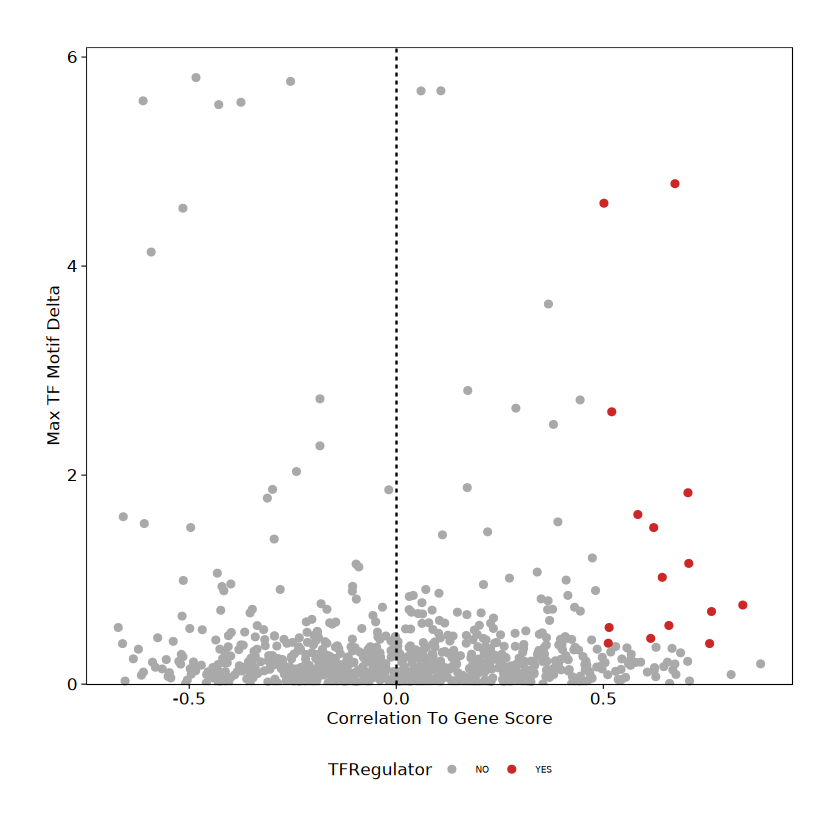

In [32]:
p <- ggplot(data.frame(corGSM_MM), aes(cor, maxDelta, color = TFRegulator)) +
  geom_point() + 
  theme_ArchR() +
  geom_vline(xintercept = 0, lty = "dashed") + 
  scale_color_manual(values = c("NO"="darkgrey", "YES"="firebrick3")) +
  xlab("Correlation To Gene Score") +
  ylab("Max TF Motif Delta") +
  scale_y_continuous(
    expand = c(0,0), 
    limits = c(0, max(corGSM_MM$maxDelta)*1.05)
  )

p
## Warning: Removed 7 rows containing missing values or values outside the scale
## range (`geom_point()`).

In [33]:
corGIM_MM <- corGIM_MM[order(abs(corGIM_MM$cor), decreasing = TRUE), ]
corGIM_MM <- corGIM_MM[which(!duplicated(gsub("\\-.*","",corGIM_MM[,"MotifMatrix_name"]))), ]
corGIM_MM$TFRegulator <- "NO"
corGIM_MM$TFRegulator[which(corGIM_MM$cor > 0.5 & corGIM_MM$padj < 0.01 & corGIM_MM$maxDelta > quantile(corGIM_MM$maxDelta, 0.75))] <- "YES"
sort(corGIM_MM[corGIM_MM$TFRegulator=="YES",1])

[1] "CEBPE"  "EPAS1"  "FOSL1"  "MAF"    "NFKB1"  "PAX8"   "REL"    "RELB"  
 [9] "RFX3"   "TCF21"  "TEAD4"  "ZEB1"   "ZNF281"

Warning message:
“Removed 148 rows containing missing values or values outside the scale range
(`geom_point()`).”


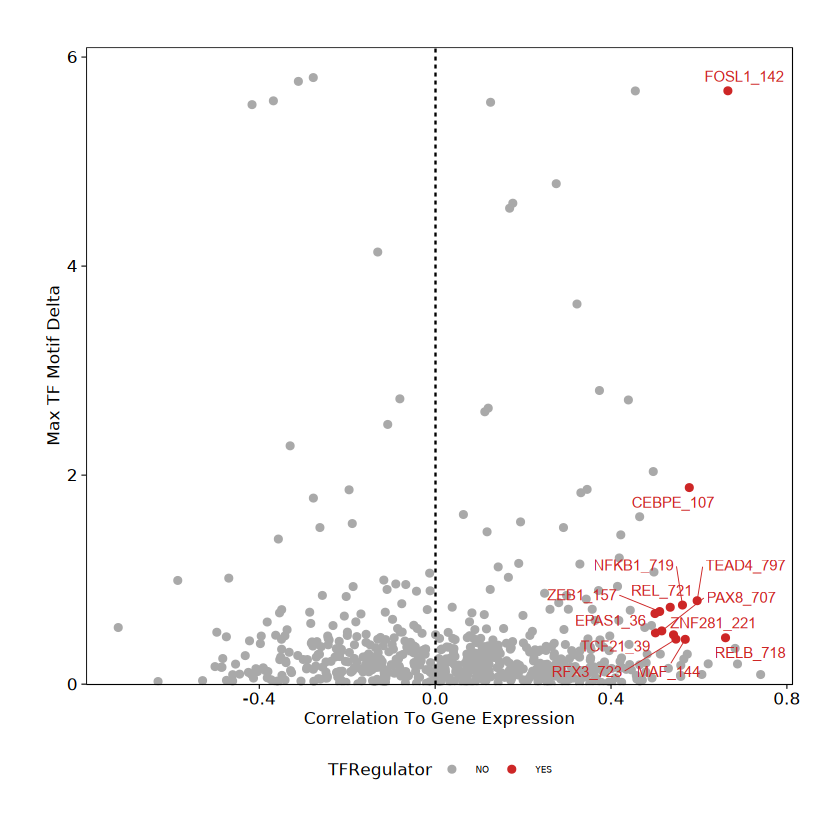

In [35]:
corGIM_MM$TF <- gsub("\\-.*","", corGIM_MM$MotifMatrix_name)
lab_dat <- subset(corGIM_MM, TFRegulator == "YES")

p <- ggplot(corGIM_MM, aes(cor, maxDelta, color = TFRegulator)) +
  geom_point() +
  theme_ArchR() +
  geom_vline(xintercept = 0, lty = "dashed") +
  scale_color_manual(values = c("NO"="darkgrey", "YES"="firebrick3")) +
  xlab("Correlation To Gene Expression") +
  ylab("Max TF Motif Delta") +
  scale_y_continuous(expand = c(0,0), limits = c(0, max(corGIM_MM$maxDelta)*1.05)) +
  ggrepel::geom_text_repel(
    data = lab_dat,
    aes(label = TF),
    show.legend = FALSE,
    size = 3,
    box.padding = 0.3,
    point.padding = 0.1,
    segment.size = 0.2,
    max.overlaps = Inf
  )

p

In [41]:
ggsave("/data/hanxue/figures/Mye-TF-Correlation.svg",plot = p, width = 6, height = 6, device = "svg")

Warning message:
“Removed 148 rows containing missing values or values outside the scale range
(`geom_point()`).”


In [69]:
# 保存
saveArchRProject(ArchRProj = proj, 
                 load = FALSE)
sessionInfo()

Saving ArchRProject...



R version 4.4.1 (2024-06-14)
Platform: x86_64-conda-linux-gnu
Running under: Ubuntu 22.04.2 LTS

Matrix products: default
BLAS/LAPACK: /home/hanxue/miniconda3/envs/scseq/lib/libopenblasp-r0.3.21.so;  LAPACK version 3.9.0

Random number generation:
 RNG:     L'Ecuyer-CMRG 
 Normal:  Inversion 
 Sample:  Rejection 
 
locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
 [1] parallel  stats4    grid      stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] circlize_0.4.16                   ComplexHeatmap_2.21.2            
 [3] writexl_1.5.2                     nabor_0.5.0                      
 [5] hexbin_1.28.5    